In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacepy
import os
from uncertainties import ufloat, unumpy
import datetime as dt
import copy
import seaborn as sns
import geopandas as gpd

%load_ext autoreload
%autoreload 2

import spectra_running_tools as SRT

import sketch


In [ ]:
def save_figure_for_paper(file_name:str):

    path_to_paper_folder = "../../../../../windowsDesktop/HEPI background paper files/"

    plt.savefig(path_to_paper_folder + file_name + ".png", bbox_inches="tight",dpi=500)
    plt.savefig(path_to_paper_folder + file_name + ".eps", bbox_inches="tight",dpi=500)

In [4]:
SRT.default_shielding_geometry.aluminium_thickness_in_mm

2.0

In [5]:
SRT.default_shielding_geometry.tantalum_thickness_in_mm

0.5

In [6]:
from tqdm import tqdm

In [7]:
def fill_between_errorbar(x_vals,y_vals,y_err,**kwargs):

    plt.plot(x_vals,
            y_vals,
            marker="o",
            ms=3,
            **kwargs)
    plt.fill_between(x_vals,
                np.array(y_vals) - np.array(y_err),
                np.array(y_vals) + np.array(y_err),
                color=plt.gca().lines[-1].get_color(),
                alpha=0.4)

In [8]:
index_for_horns_max = 839
index_for_SAA_max = 826
index_for_polar = 847

In [9]:
spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)
spacecraft_coords_DF.columns = ['ModifiedJulianDay',
'Altitude_km',
'Latitude_deg',
'Longitude_deg',
'LocalTime_hrs',
'PitchAngle_deg']
spacecraft_coords_DF

/tmp/ipykernel_95657/1845830959.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)


,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


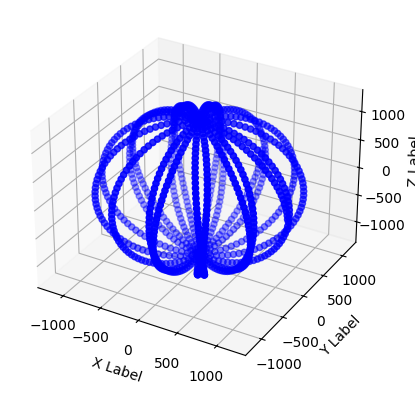

In [10]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# get the data from the dataframe
index = spacecraft_coords_DF.index
ModifiedJulianDay = spacecraft_coords_DF['ModifiedJulianDay']
Altitude_km = spacecraft_coords_DF['Altitude_km']
Latitude_deg = spacecraft_coords_DF['Latitude_deg']
Longitude_deg = spacecraft_coords_DF['Longitude_deg']
LocalTime_hrs = spacecraft_coords_DF['LocalTime_hrs']
PitchAngle_deg = spacecraft_coords_DF['PitchAngle_deg']

# convert coordinates to Cartesian 
x = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.cos(np.radians(Longitude_deg)) 
y = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.sin(np.radians(Longitude_deg)) 
z = Altitude_km * np.sin(np.radians(Latitude_deg)) 

# plot the trajectory in 3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, c='b', marker='o') 
ax.set_xlabel('X Label') 
ax.set_ylabel('Y Label') 
ax.set_zlabel('Z Label') 
plt.show() 

In [11]:
IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)
IRENE8_450_electrons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.04,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    1,
    1.25,
    1.5,
    1.75,
    2,
    2.25,
    2.5,
    2.75,
    3,
    3.25,
    3.5,
    3.75,
    4,
    4.25,
    4.5,
    4.75,
    5,
    5.5,
    6,
    6.5,
    7
]
IRENE8_450_electrons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_electrons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_electrons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_electrons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_electrons

/tmp/ipykernel_95657/3684036918.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)


,Latitude_deg,Longitude_deg,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,3.75,4,4.25,4.5,4.75,5,5.5,6,6.5,7
0,0.000000,354.938757,1537300.0,1209300.0,750380.0,339930.0,112420.0,37182.0,19539.0,10268.0,...,1.6375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.313331,354.688073,729880.0,574970.0,363090.0,168080.0,57040.0,19357.0,10406.0,5594.3,...,1.5384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.626412,354.437390,387980.0,307940.0,198260.0,94564.0,33416.0,11808.0,6514.8,3594.5,...,1.9403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.939000,354.186707,287760.0,228280.0,146830.0,69917.0,24649.0,8689.6,4788.0,2638.2,...,1.4023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.250860,353.936025,201860.0,159250.0,98662.0,45200.0,15312.0,5187.2,2785.8,1496.1,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)
IRENE8_450_protons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.1, 
    0.15, 
    0.2, 
    0.3, 
    0.4, 
    0.5, 
    0.6, 
    0.7, 
    1, 
    1.5, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    10, 
    15, 
    20, 
    30, 
    40, 
    50, 
    60, 
    70, 
    100, 
    150, 
    200, 
    300, 
    400
]
IRENE8_450_protons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_protons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_protons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_protons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

cols_to_use = [
    "Latitude_deg",
    "Longitude_deg",
    100,
    150, 
    200, 
    300, 
    400
]

IRENE8_450_protons_original = IRENE8_450_protons.copy()
IRENE8_450_protons = IRENE8_450_protons[cols_to_use]

/tmp/ipykernel_95657/3175779400.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)


In [13]:
def convert_integral_values_to_differential(integral_DF):

    differential_DF_coords = integral_DF.iloc[:,:2]

    differential_DF_energy_vals = (integral_DF.iloc[:,2:-1].columns +integral_DF.iloc[:,3:].columns)/2
    differential_DF_values = -1 * integral_DF.iloc[:,2:].diff(axis=1).iloc[:,1:] / np.diff(integral_DF.iloc[:,2:].columns)
    differential_DF_values.columns = differential_DF_energy_vals

    return pd.concat([differential_DF_coords,differential_DF_values],axis=1)

In [14]:
IRENE8_450_electrons_differential = convert_integral_values_to_differential(IRENE8_450_electrons)
IRENE8_450_protons_differential = convert_integral_values_to_differential(IRENE8_450_protons)
IRENE8_450_protons_original_differential = convert_integral_values_to_differential(IRENE8_450_protons_original)

In [15]:
IRENE8_450_electrons_differential_shortened = IRENE8_450_electrons_differential.drop(columns=IRENE8_450_electrons_differential.columns[2:11])

In [16]:
IRENE8_450_electrons_differential_shortened

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
0,0.000000,354.938757,5039.2,2607.72,922.28,618.24,504.52,302.04,199.78,111.164,...,18.7532,6.55,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.313331,354.688073,2716.08,1416.32,498.24,337.44,286.28,170.52,113.232,62.176,...,11.3468,6.1536,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,6.626412,354.437390,1774.0,945.88,337.76,232.16,201.908,122.04,82.488,45.996,...,7.4096,7.7612,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,9.939000,354.186707,1300.24,692.28,246.88,169.56,147.344,88.964,60.068,33.452,...,5.3692,5.6092,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,13.250860,353.936025,725.48,378.56,133.744,90.44,76.012,45.424,30.2536,16.6852,...,4.7284,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [17]:
IRENE8_450_protons_differential

,Latitude_deg,Longitude_deg,125.0,175.0,250.0,350.0
0,0.000000,354.938757,9.816,6.6716,4.0078,1.7372
1,3.313331,354.688073,9.078,6.3254,3.9933,1.7975
2,6.626412,354.437390,8.1354,5.7348,3.7211,1.7
3,9.939000,354.186707,6.2192,4.38,2.8863,1.2899
4,13.250860,353.936025,4.234,2.9386,1.9272,0.81285
...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0


## Defining running across orbit

In [18]:
def get_photon_inducing_event_count_per_second(output_run, threshold_photon_value=10.0):
    try:
        return output_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value)
    except AttributeError:
        return output_run

In [19]:
def get_single_rad_photon_inducing_event_count_per_second(output_run, threshold_photon_value=10.0):
    try:
        return output_run.outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value)
    except AttributeError:
        return output_run

In [20]:
class orbital_run():

    def __init__(self, 
                 DF_of_coordinates_and_spectra:pd.DataFrame, 
                 particle_species:str, 
                 shielding_geometry=SRT.default_shielding_geometry,
                 label=None,
                 label_for_run=None,
                 threshold_photon_value=10.0,
                 number_of_particles_to_simulate=100_000,
                 ignore_coincidence_horns_regions=True,
                 **kwargs):

        self.run_dict = {}

        self.label = label

        self.ignore_coincidence_horns_regions = ignore_coincidence_horns_regions

        self.DF_of_coordinates_and_spectra = DF_of_coordinates_and_spectra

        for index, spectrum_row in tqdm(DF_of_coordinates_and_spectra.iterrows()):

            self.run_dict[index] = self.run_Cherenkov_simulation_across_row(particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row, **kwargs)

        self.run_dict_event_counts = pd.Series(self.run_dict).apply(lambda x:get_photon_inducing_event_count_per_second(x,
                                                                                                                        threshold_photon_value=threshold_photon_value))

        horns_region_lower_limit = -50.0
        horns_region_upper_limit = 45.0
        if self.ignore_coincidence_horns_regions is True:
            for index, spectrum_row in tqdm(DF_of_coordinates_and_spectra.iterrows()):
                if not ((spectrum_row["Latitude_deg"] <=horns_region_upper_limit) & (spectrum_row["Latitude_deg"] >=horns_region_lower_limit)):
                    self.run_dict_event_counts[index] = ufloat(0.0,0.0)

        self.single_rad_run_dict_event_counts = pd.Series(self.run_dict).apply(lambda x:get_single_rad_photon_inducing_event_count_per_second(x,
                                                                                                                        threshold_photon_value=threshold_photon_value))

    def run_Cherenkov_simulation_across_row(self, particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row, **kwargs):
        
        file_path_to_use = f"file_path_for_spectrum_row.csv"

        spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

        max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

        if max_particles_per_s > 0.0:

            row_as_a_spectrum = SRT.particle_spectrum(particle_species=SRT.particle(particle_species),
                                                        spectrum_file_path=file_path_to_use,
                                                        incoming_particles_per_s_per_cm2=max_particles_per_s)
                                                        
            Cherenkov_run_for_row = SRT.wrapper_gras_Cherenkov_runner_from_objects(row_as_a_spectrum,
            #Cherenkov_run_for_row = SRT.gras_Cherenkov_runner_from_objects(row_as_a_spectrum,
                                                shielding_geometry,
                                                #SRT.no_shielding_geometry,
                                                Cherenkov_run_label = label_for_run,
                                                number_of_particles=number_of_particles_to_simulate,
                                                number_of_radiators=2,
                                                **kwargs);

        else:
            Cherenkov_run_for_row = ufloat(0.0,0.0)

        os.remove(file_path_to_use)
        return Cherenkov_run_for_row

    def plot_run_dict(self, xvalues_to_use = None, error_bar_function=plt.errorbar):

        if xvalues_to_use is None:
            xvalues_to_use = self.run_dict_event_counts.index
        elif isinstance(xvalues_to_use,str):
            if xvalues_to_use == "latitudes":
                xvalues_to_use = self.DF_of_coordinates_and_spectra["Latitude_deg"]

        error_bar_function(xvalues_to_use,
                self.run_dict_event_counts.apply(lambda x:x.n),
                self.run_dict_event_counts.apply(lambda x:x.std_dev),
                label=self.label)
        plt.yscale("log")
        plt.grid(True)
        plt.ylabel("cts / second")
        plt.xlabel("Latitude (degrees)")

    def plot_single_rad_run_dict(self, xvalues_to_use = None, error_bar_function=plt.errorbar):

        if xvalues_to_use is None:
            xvalues_to_use = self.single_rad_run_dict_event_counts.index
        elif isinstance(xvalues_to_use,str):
            if xvalues_to_use == "latitudes":
                xvalues_to_use = self.DF_of_coordinates_and_spectra["Latitude_deg"]

        error_bar_function(xvalues_to_use,
                self.single_rad_run_dict_event_counts.apply(lambda x:x.n),
                self.single_rad_run_dict_event_counts.apply(lambda x:x.std_dev),
                label=self.label)
        plt.yscale("log")
        plt.grid(True)
        plt.ylabel("cts / second")
        plt.xlabel("Latitude (degrees)")

    def __add__(self, right):

        output_orbital_run = copy.deepcopy(self)

        output_orbital_run.run_dict = {0:self.run_dict, 1:right.run_dict}

        output_orbital_run.run_dict_event_counts = self.run_dict_event_counts + right.run_dict_event_counts
        output_orbital_run.label = self.label + " plus " + right.label

        return output_orbital_run

    def print_count_rates_info(self):

        print(f"polar region count rate: {self.run_dict_event_counts[index_for_polar]} cts/s".replace("+/-","±"))
        print(f"horns region count rate: {self.run_dict_event_counts[index_for_horns_max]} cts/s".replace("+/-","±"))
        print(f"SAA region count rate: {self.run_dict_event_counts[index_for_SAA_max]} cts/s".replace("+/-","±"))

In [21]:
IRENE8_450_electrons_differential_shortened_single_orbit = IRENE8_450_electrons_differential_shortened.iloc[790:850].sample(60,random_state=1).sort_index()


In [22]:
IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, 
    number_of_particles_to_simulate=1_000_000, 
    particle_species="e-",
    label="AE8 electrons",
    threshold_photon_value=20.0,
    ignore_coincidence_horns_regions=False)

0it [00:00, ?it/s]

/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/home/xisacross/programming/HEPI/.venv/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
11it [00:00, 95.46it/s]/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spec

In [23]:
IRENE8_450_electrons_orbital_run.run_dict[800].outputted_tuple.number_of_events_simulated

1000000

In [24]:
IRENE8_450_electrons_orbital_run.run_dict_event_counts

790              0.0+/-0
791              0.0+/-0
792              0.0+/-0
793              0.0+/-0
794              0.0+/-0
795              0.0+/-0
796              0.0+/-0
797              0.0+/-0
798              0.0+/-0
799        0.000+/-0.011
800            0.0+/-0.5
801            0.0+/-2.0
802                0+/-4
803            0.0+/-3.0
804          0.00+/-0.33
805        0.000+/-0.004
806    0.00000+/-0.00024
807      0.0000+/-0.0015
808        0.000+/-0.005
809        0.000+/-0.030
810          0.00+/-0.09
811          0.00+/-0.27
812          0.00+/-0.30
813          0.00+/-0.16
814          0.00+/-0.10
815          0.00+/-0.08
816          0.00+/-0.10
817          0.00+/-0.14
818          0.00+/-0.17
819          0.00+/-0.23
820            0.0+/-0.4
821            0.0+/-0.7
822            0.0+/-0.9
823            0.0+/-2.3
824                0+/-4
825                0+/-7
826                0+/-8
827                0+/-6
828            0.0+/-3.4
829            0.0+/-1.9


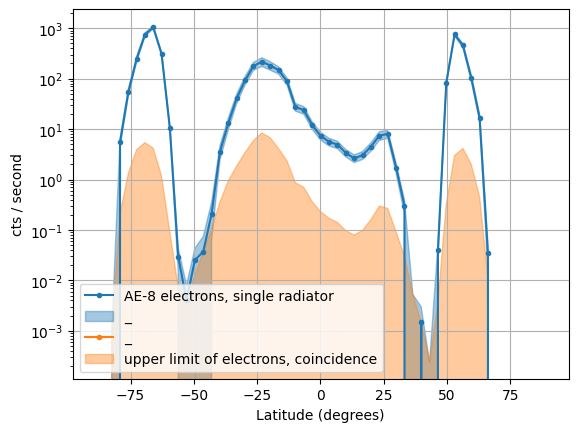

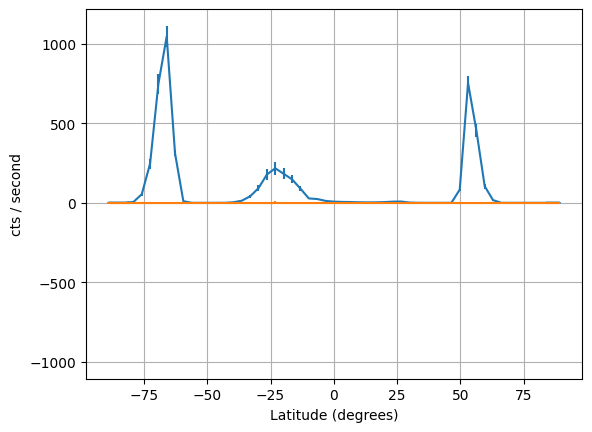

In [25]:
IRENE8_450_electrons_orbital_run.plot_single_rad_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
plt.legend(["AE-8 electrons, single radiator","_","_","upper limit of electrons, coincidence"])

plt.figure()

IRENE8_450_electrons_orbital_run.plot_single_rad_run_dict(xvalues_to_use = "latitudes")
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use = "latitudes")

plt.yscale("linear")

In [26]:
dir(IRENE8_450_electrons_orbital_run.run_dict[800].outputted_tuple)

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'coincidence_tuple_dictionary',
 'construct_hits_dictionary',
 'convert_to_theta_phi_DF',
 'determine_pulse_height_distributions',
 'generated_photons_DF',
 'generated_primary_DF',
 'get_coincidence_DF',
 'get_coincidence_events',
 'get_coincidence_tuple',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'get_relevant_hit_key',
 'hits',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'output_tuples',
 'plot_coincidence_pulse_height_distribution',
 'plot_differential_primary_spectra',
 'plot_integral_pri

In [27]:
IRENE8_450_electrons_orbital_run.run_dict[800].outputted_tuple.output_tuples

{'RA1_tuple_interaction;1': <Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f2214a4d760>,
 'FL1_tuple_fluence;1_CK': <Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f2214bf9fa0>,
 'RA2_tuple_interaction;1': <Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f2214bb8110>,
 'FL2_tuple_fluence;1_CK': <Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f2214b3e4e0>}

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


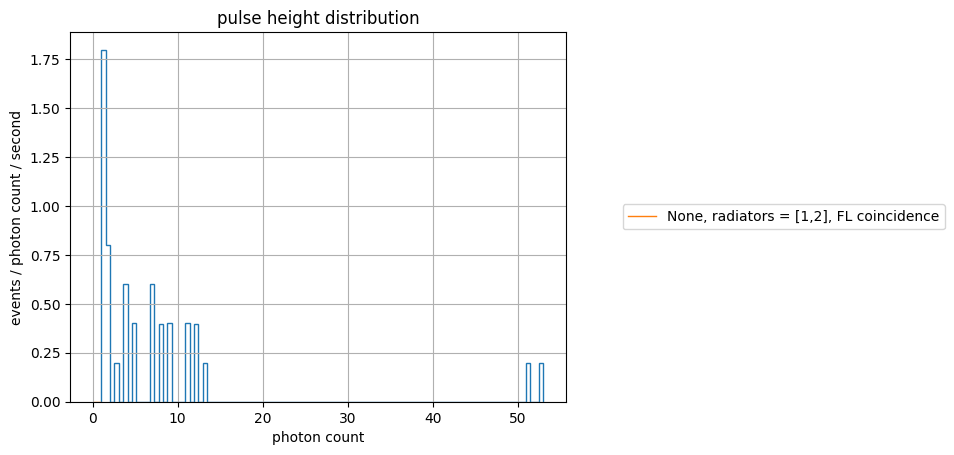

In [28]:
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [29]:
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

0.7273088585955116+/-0.27489690945399514

In [30]:
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

0.0+/-0.10390126551364452

In [31]:
IRENE8_450_protons_differential_single_orbit = IRENE8_450_protons_differential.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_protons_differential_single_orbit.head()


,Latitude_deg,Longitude_deg,125.0,175.0,250.0,350.0
790,84.29629,156.896069,-0.0,-0.0,-0.0,-0.0
791,87.57371,156.643162,-0.0,-0.0,-0.0,-0.0
792,89.14890,336.407396,-0.0,-0.0,-0.0,-0.0
793,85.87130,336.147949,-0.0,-0.0,-0.0,-0.0
794,82.59322,335.896262,-0.0,-0.0,-0.0,-0.0


In [32]:
IRENE8_450_protons_original_differential_single_orbit = IRENE8_450_protons_original_differential.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_protons_original_differential_single_orbit.head()

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.65,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
790,84.29629,156.896069,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
791,87.57371,156.643162,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
792,89.14890,336.407396,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
793,85.87130,336.147949,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
794,82.59322,335.896262,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [33]:
IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit, 
                                            particle_species="proton",
                                            #number_of_particles_to_simulate=1_000_000,
                                            #number_of_particles_to_simulate=100_000,
                                            number_of_particles_to_simulate=20_000,
                                            label="AP8 protons",
                                            threshold_photon_value=20.0,
                                            ignore_coincidence_horns_regions=False)

0it [00:00, ?it/s]

/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/home/xisacross/programming/HEPI/.venv/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, sp

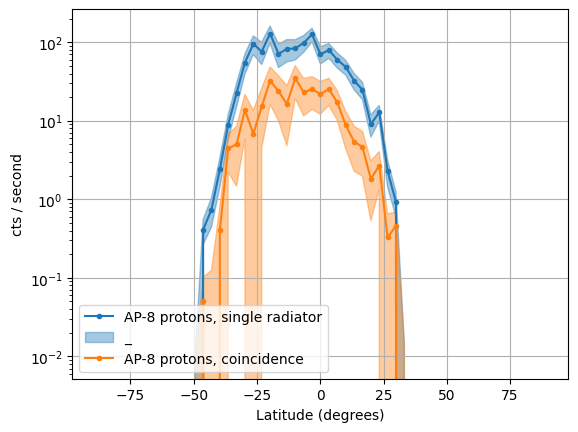

In [34]:
IRENE8_450_protons_orbital_run.plot_single_rad_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
plt.legend(["AP-8 protons, single radiator","_","AP-8 protons, coincidence"])

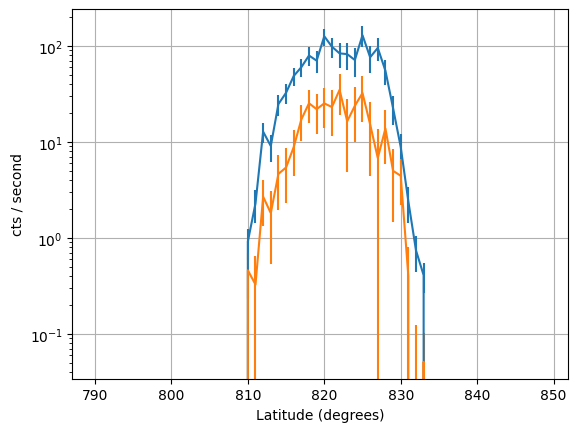

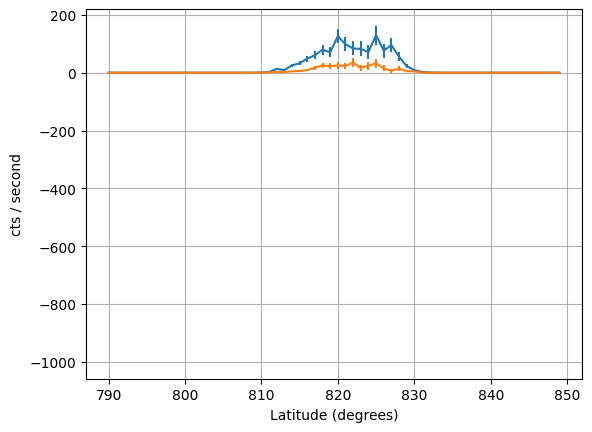

In [35]:
IRENE8_450_protons_orbital_run.plot_single_rad_run_dict()
IRENE8_450_protons_orbital_run.plot_run_dict()

plt.figure()

IRENE8_450_protons_orbital_run.plot_single_rad_run_dict()
IRENE8_450_protons_orbital_run.plot_run_dict()

plt.yscale("linear")

In [36]:
dir(IRENE8_450_protons_orbital_run)

['DF_of_coordinates_and_spectra',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ignore_coincidence_horns_regions',
 'label',
 'plot_run_dict',
 'plot_single_rad_run_dict',
 'print_count_rates_info',
 'run_Cherenkov_simulation_across_row',
 'run_dict',
 'run_dict_event_counts',
 'single_rad_run_dict_event_counts']

In [37]:
IRENE8_450_protons_orbital_run.run_dict

{790: 0.0+/-0,
 791: 0.0+/-0,
 792: 0.0+/-0,
 793: 0.0+/-0,
 794: 0.0+/-0,
 795: 0.0+/-0,
 796: 0.0+/-0,
 797: 0.0+/-0,
 798: 0.0+/-0,
 799: 0.0+/-0,
 800: 0.0+/-0,
 801: 0.0+/-0,
 802: 0.0+/-0,
 803: 0.0+/-0,
 804: 0.0+/-0,
 805: 0.0+/-0,
 806: 0.0+/-0,
 807: 0.0+/-0,
 808: 0.0+/-0,
 809: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fb85a30>,
 810: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fbb1a00>,
 811: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fa1cad0>,
 812: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fa5fad0>,
 813: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220faa7290>,
 814: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fadb9e0>,
 815: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220f923fe0>,
 816: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220f977530>,
 817: <spectra_running_tools.gras_Cherenkov

In [38]:
IRENE8_450_protons_orbital_run.run_dict

{790: 0.0+/-0,
 791: 0.0+/-0,
 792: 0.0+/-0,
 793: 0.0+/-0,
 794: 0.0+/-0,
 795: 0.0+/-0,
 796: 0.0+/-0,
 797: 0.0+/-0,
 798: 0.0+/-0,
 799: 0.0+/-0,
 800: 0.0+/-0,
 801: 0.0+/-0,
 802: 0.0+/-0,
 803: 0.0+/-0,
 804: 0.0+/-0,
 805: 0.0+/-0,
 806: 0.0+/-0,
 807: 0.0+/-0,
 808: 0.0+/-0,
 809: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fb85a30>,
 810: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fbb1a00>,
 811: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fa1cad0>,
 812: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fa5fad0>,
 813: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220faa7290>,
 814: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220fadb9e0>,
 815: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220f923fe0>,
 816: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f220f977530>,
 817: <spectra_running_tools.gras_Cherenkov

In [39]:
IRENE8_450_protons_orbital_run.run_dict[809].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20)

0.0+/-0.014194469591155546

In [40]:
dir(IRENE8_450_protons_orbital_run.run_dict[809].outputted_tuple)

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'coincidence_tuple_dictionary',
 'construct_hits_dictionary',
 'convert_to_theta_phi_DF',
 'determine_pulse_height_distributions',
 'generated_photons_DF',
 'generated_primary_DF',
 'get_coincidence_DF',
 'get_coincidence_events',
 'get_coincidence_tuple',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'get_relevant_hit_key',
 'hits',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'output_tuples',
 'plot_coincidence_pulse_height_distribution',
 'plot_differential_primary_spectra',
 'plot_integral_pri

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


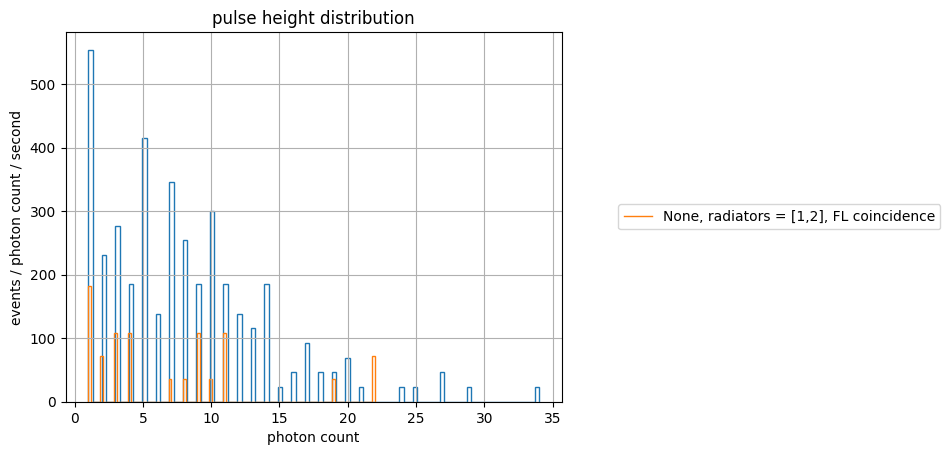

In [41]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [42]:
dir(IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'])

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'determine_pulse_height_distributions',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 'plot_pulse_height_distribution',
 'plot_smoother_pulse_height_distribution',
 'primary_particle_Cherenkov_tuple',
 'pulse_height_distribution_averaged_method',
 'pulse_height_distribution_monte_carlo',
 'random_reject_pde',
 'secondary_particle_Cherenkov_tuple',
 'threshold_primary_energy']

In [43]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)


464.8634378718681+/-59.51966417999362

In [44]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

53.344984673820925+/-20.16250901992603

In [45]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

15.241424192520265+/-10.777314401471779

0it [00:00, ?it/s]

/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

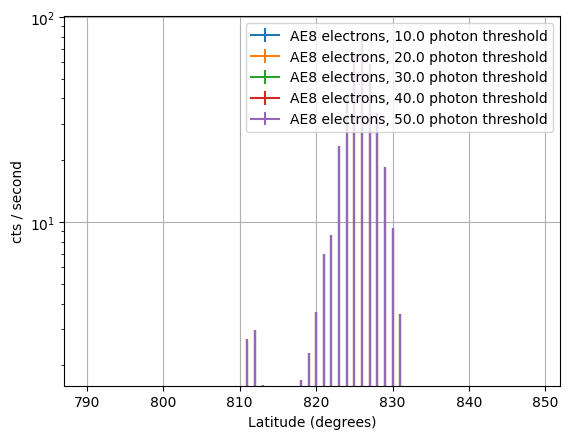

In [46]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, 
                particle_species="e-",
                label=f"AE8 electrons, {photon_threshold} photon threshold",
                threshold_photon_value=photon_threshold).plot_run_dict()
plt.legend()

0it [00:00, ?it/s]/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)


/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_95657/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

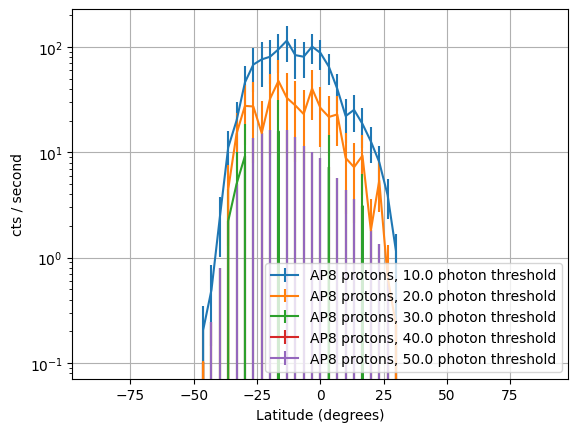

In [47]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_protons_differential_single_orbit, 
                particle_species="proton",
                #number_of_particles_to_simulate=1_000_000,
                number_of_particles_to_simulate=10_000,
                label=f"AP8 protons, {photon_threshold} photon threshold",
                threshold_photon_value=photon_threshold).plot_run_dict(xvalues_to_use="latitudes")#,error_bar_function=fill_between_errorbar)
plt.legend()

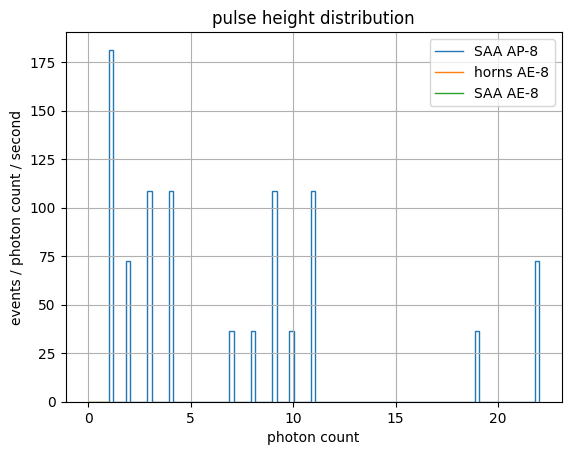

In [48]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()

plt.legend(["SAA AP-8","horns AE-8","SAA AE-8"])

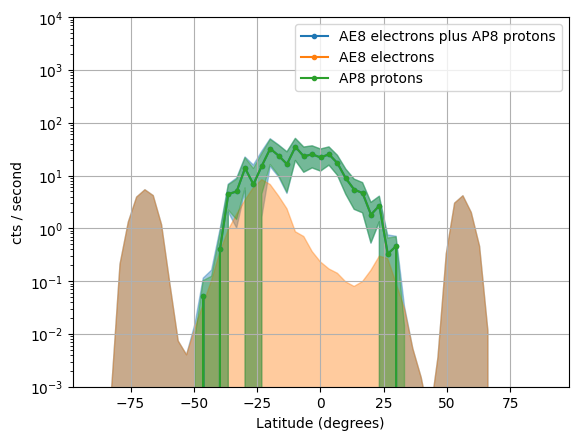

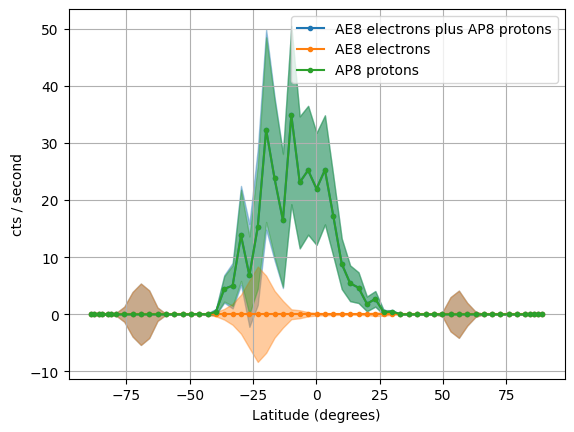

In [49]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
plt.legend()
#plt.legend(["total","electrons","protons"])
plt.ylim([1e-3,1e4])
save_figure_for_paper("HEPI_background_output_coincidence")

plt.figure()
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
#plt.legend(["total","electrons","protons"])
plt.legend()
plt.yscale("linear")

In [50]:
default_rigidities = np.concatenate([[0,1,2,3,4],np.linspace(5,20,5)])

In [51]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

In [52]:
array_of_GCR_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                         SRT.get_GCR_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,
                                                                                    datetime_to_use=SRT.datetime_for_GCR_solar_max)] for rigidity_cut_off_GV in default_rigidities])

In [53]:
array_of_GLE21_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                           SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,
                                                                                      GLE_spec=GLE21_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [54]:
array_of_GLE21_rig_cutoff_runs

array([[np.float64(0.0),
       [np.float64(1.0),
       [np.float64(2.0),
       [np.float64(3.0),
       [np.float64(4.0),
       [np.float64(5.0),
       [np.float64(8.75),
       [np.float64(12.5),
       [np.float64(16.25),
       [np.float64(20.0),
      dtype=object)

In [55]:
array_of_GLE05_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,GLE_spec=GLE05_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [56]:
from AsympDirsCalculator import AsympDirsTools
from scipy.interpolate import interp1d
import datetime as dt

/home/xisacross/programming/HEPI/.venv/lib/python3.12/site-packages/AsympDirsCalculator/MAGCOSmacroFileGenerator.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [57]:
def uncertainty_interp1d(x, y, **kwargs):

    n_interp = interp1d(x,[uy_value.n for uy_value in y], **kwargs)
    std_dev_interp = interp1d(x,[uy_value.std_dev for uy_value in y], **kwargs)

    return lambda x_arg:(ufloat(n_interp(x_arg),std_dev_interp(x_arg)) if np.isscalar(x_arg) else unumpy.uarray(n_interp(x_arg),std_dev_interp(x_arg)))

In [58]:
acquire_count_rate_multi = np.vectorize(lambda output_run,threshold_photon_value=10.0:output_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value))


In [59]:
class multi_rigidity_run():

    def __init__(self, rigidity_run_class, array_of_rigidities_GV=default_rigidities, input_DF_of_coords=None, label=None, threshold_photon_value=10.0, **kwargs):

        self.label = label

        if input_DF_of_coords is None:
            self.array_of_lats_and_longs = np.linspace([-90,0],[90,0],100)
        else:
            self.array_of_lats_and_longs = input_DF_of_coords[["Latitude_deg","Longitude_deg"]].to_numpy()

        self.array_of_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                                  rigidity_run_class(rigidity_cut_off_GV,**kwargs)] for rigidity_cut_off_GV in array_of_rigidities_GV])

        self.array_of_count_rates = np.transpose([self.array_of_rig_cutoff_runs[:,0],
                                                  acquire_count_rate_multi(self.array_of_rig_cutoff_runs[:,1],threshold_photon_value=threshold_photon_value)])
                                                  #SRT.acquire_count_rate(self.array_of_rig_cutoff_runs[:,1],threshold_photon_value=threshold_photon_value)])

        # self.rig_interp = interp1d(self.array_of_count_rates[:,0], 
        #                       np.vectorize(lambda x:x.nominal_value)(self.array_of_count_rates[:,1]),
        #                       fill_value="extrapolate")
        self.rig_interp = uncertainty_interp1d(self.array_of_count_rates[:,0], 
                              (self.array_of_count_rates[:,1]),
                              fill_value="extrapolate")

    def plot_count_rates(self):

        SRT.error_bar_from_array(self.array_of_count_rates)
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("cts / second")

    def get_count_rates_for_coord_array(self, array_of_lats_and_longs:np.array, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)
        vcutoffs_to_compare_to = vcutoffs_to_compare_to[
            #np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -81.194370) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 72.753770) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -56.147930) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -69.295260) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 39.842640) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 42.992710) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -3.229399) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 33.233800)]  
        vcutoffs_to_compare_to.iloc[5] = vcutoffs_to_compare_to.iloc[4]

        DF_of_count_rates = vcutoffs_to_compare_to["Reffective"].apply(self.rig_interp).reset_index().rename(columns={"Reffective":"count rate"})

        return DF_of_count_rates

    def plot_count_rates_against_longitude_0(self, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,plot_error_bars=False,**kwargs):

        DF_of_count_rates = self.get_count_rates_for_coord_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities)
        
        series_of_latitudes = DF_of_count_rates["initialLatitude"]
        series_of_count_rates = DF_of_count_rates["count rate"].apply(lambda x:x.n)
        series_of_count_rates_errs = DF_of_count_rates["count rate"].apply(lambda x:x.std_dev)
        
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_count_rates,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_count_rates - series_of_count_rates_errs,
            #             series_of_count_rates + series_of_count_rates_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)

        plt.xlabel("Latitude (degrees)")
        plt.ylabel("cts / second")
        plt.grid(True)

    def get_int_time_array(self,background_multi_rigidity_run=0):

        if background_multi_rigidity_run == 0:
            bkg_array_of_count_rates = np.zeros(np.shape(self.array_of_count_rates))
        elif isinstance(background_multi_rigidity_run,SRT.gras_Cherenkov_runner_from_objects):
            bkg_array_of_count_rates = np.full(np.shape(self.array_of_count_rates),background_multi_rigidity_run.get_total_photon_inducing_event_count_per_second())
        else:
            bkg_array_of_count_rates = background_multi_rigidity_run.array_of_count_rates

        int_time_array = np.array([[self.array_of_count_rates[index,0],
                                    SRT.get_integration_time_for_sigma(3,self.array_of_count_rates[index,1],
                                    bkg_array_of_count_rates[index,1])] for index in range(0,len(self.array_of_count_rates))])

        return int_time_array

    def plot_int_time_array(self,background_multi_rigidity_run=0):

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        SRT.error_bar_from_array(int_time_array, label=self.label)

        plt.axhline(60,ls="--")
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("required integration time\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")

    def get_count_rates_for_int_time_array(self, 
                                           array_of_lats_and_longs:np.array, 
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max, 
                                           background_multi_rigidity_run=0):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        time_array_rig_interp = uncertainty_interp1d(int_time_array[:,0], 
                              (int_time_array[:,1]))

        DF_of_int_times = vcutoffs_to_compare_to["Reffective"].apply(time_array_rig_interp).reset_index().rename(columns={"Reffective":"int time"})

        return DF_of_int_times

    def plot_int_time_array_vs_longitude_0(self,
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,
                                           background_multi_rigidity_run=0,
                                           plot_error_bars=False,
                                           **kwargs):

        DF_of_int_times = self.get_count_rates_for_int_time_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities,
                                                            background_multi_rigidity_run=background_multi_rigidity_run)
        
        series_of_latitudes = DF_of_int_times["initialLatitude"]
        series_of_int_times = DF_of_int_times["int time"].apply(lambda x:x.n)
        series_of_int_times_errs = DF_of_int_times["int time"].apply(lambda x:x.std_dev)

        #DF_of_int_times.plot("initialLatitude","int time",ax=plt.gca())
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_int_times,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_int_times - series_of_int_times_errs,
            #             series_of_int_times + series_of_int_times_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)

        plt.axhline(60,ls="--")
        plt.xlabel("Latitude (degrees)")
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")
        plt.grid()



running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


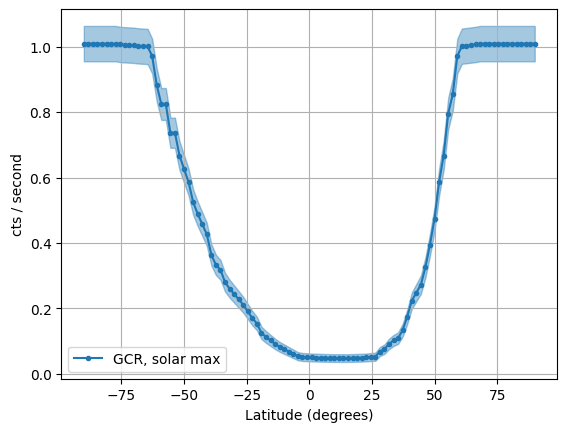

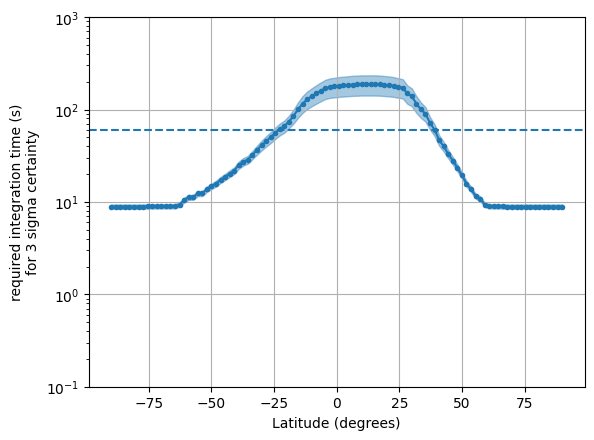

: 

In [ ]:
GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                            datetime_to_use=SRT.datetime_for_GCR_solar_max, 
                                            #input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                                            threshold_photon_value=20.0, 
                                            label = "GCR, solar max",
                                           number_of_radiators=2)
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0() #marker="o",ms=3,mfc="black",ecolor="black")

In [ ]:
alpha_GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                            datetime_to_use=SRT.datetime_for_GCR_solar_max,
                                            #input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                                            threshold_photon_value=20.0,
                                            label = "GCR, solar max",
                                            atomic_number_for_cosmic_rays = 2,
                                            number_of_radiators=2)
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
alpha_GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0() #marker="o",ms=3,mfc="black",ecolor="black")
plt.ylim([1e-1,1e4])

In [61]:
alpha_GCR_max_multi_rig_run.array_of_rig_cutoff_runs

array([[np.float64(0.0),
       [np.float64(1.0),
       [np.float64(2.0),
       [np.float64(3.0),
       [np.float64(4.0),
       [np.float64(5.0),
       [np.float64(8.75),
       [np.float64(12.5),
       [np.float64(16.25),
       [np.float64(20.0),
      dtype=object)

In [62]:
alpha_GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.3577102252470316+/-0.010930414195185893

In [ ]:
alpha_GCR_max_multi_rig_run.array_of_count_rates

array([[np.float64(0.0), 0.0050099471323113666+/-0.0012935627872547688],
       [np.float64(1.0), 0.0050099471323113666+/-0.0012935627872547688],
       [np.float64(2.0), 0.004675950656823942+/-0.0012497003796639835],
       [np.float64(3.0), 0.004341954181336518+/-0.0012042414181941603],
       [np.float64(4.0), 0.004341954181336518+/-0.0012042414181941603],
       [np.float64(5.0), 0.004341954181336518+/-0.0012042414181941603],
       [np.float64(8.75), 0.002671971803899396+/-0.0009446846908382575],
       [np.float64(12.5), 0.002337975328411971+/-0.0008836716129118058],
       [np.float64(16.25), 0.001335985901949698+/-0.000667992950974849],
       [np.float64(20.0), 0.0010019894264622733+/-0.0005784988650931523]],
      dtype=object)

In [64]:
alpha_GCR_max_multi_rig_run.rig_interp(0.0)

0.0050099471323113666+/-0.0012935627872547688

## testing coincidence normalisation

In [ ]:
dir(GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_particle_spectrum_and_generate_GRAS_file',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

In [66]:
single_radiator_run = SRT.wrapper_GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=1,
                                           number_of_particles=10_010)

In [67]:
single_radiator_run.incoming_particles_per_s

np.float64(29.005043285823753)

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


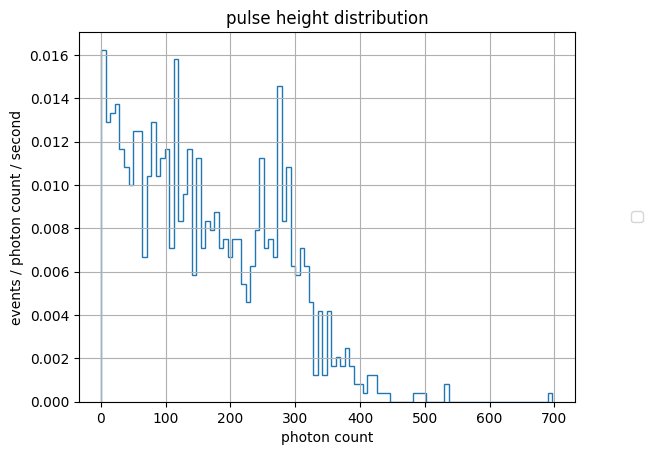

In [68]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()

In [69]:
alpha_single_radiator_run = SRT.wrapper_GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=1,
                                           atomic_number_for_cosmic_rays = 2,
                                           number_of_particles=10_010)

In [ ]:
alpha_single_radiator_run.incoming_particles_per_s

np.float64(3.3399647548742446)

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


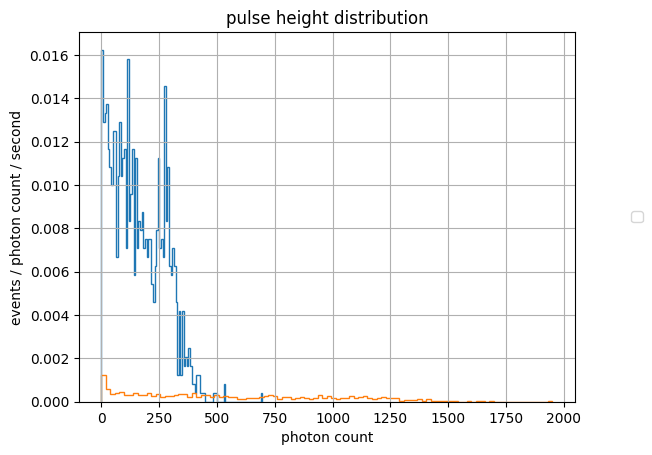

In [71]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
alpha_single_radiator_run.outputted_tuple.plot_pulse_height_distribution()

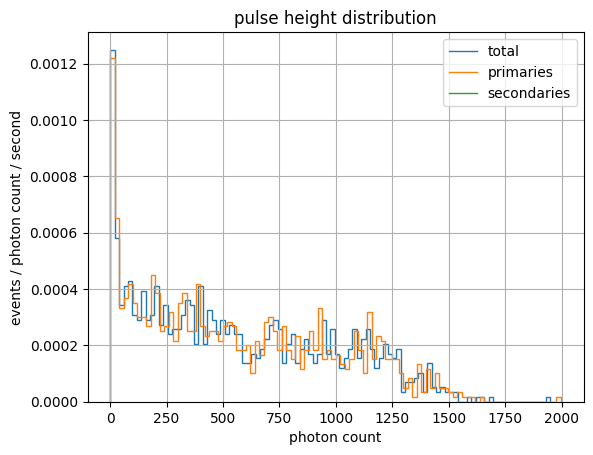

In [72]:
alpha_single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
alpha_single_radiator_run.outputted_tuple.primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
alpha_single_radiator_run.outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
plt.legend(["total","primaries","secondaries"])

In [73]:
single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

2.9642516764633067+/-0.09267812893561446

In [74]:
alpha_single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.32932519610997796+/-0.0104825364878315

In [75]:
single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0) / \
    alpha_single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

9.000986597677137+/-0.40159819349920123

In [76]:
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].incoming_particles_per_s

np.float64(29.005043285823753)

In [77]:
dir(single_radiator_run.outputted_tuple)

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'determine_pulse_height_distributions',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 'plot_pulse_height_distribution',
 'plot_smoother_pulse_height_distribution',
 'primary_particle_Cherenkov_tuple',
 'pulse_height_distribution_averaged_method',
 'pulse_height_distribution_monte_carlo',
 'random_reject_pde',
 'secondary_particle_Cherenkov_tuple',
 'threshold_primar

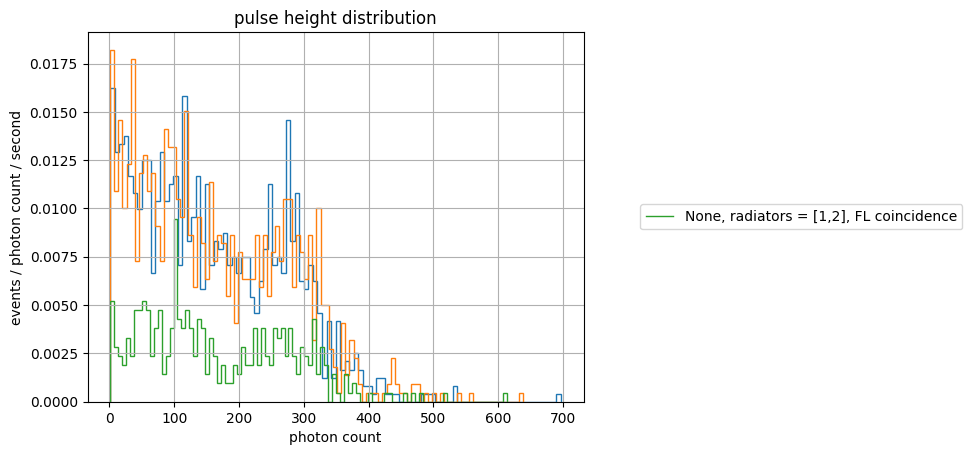

In [78]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [ ]:
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)


3.129644170540383+/-0.09527615894637534

In [ ]:
3 * GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

3.115141648897471+/-0.16464035201105184

In [81]:
single_radiator_run = SRT.GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=1,
                                           #verbose_output=True,
                                           save_DF_of_output_hits = True)

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector

In [1]:
single_radiator_run.outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

NameError: name 'single_radiator_run' is not defined

In [82]:
multi_radiator_run = SRT.GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=2,
                                           #verbose_output=True,
                                           save_DF_of_output_hits = True)

: 

In [82]:
dir(single_radiator_run)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_particle_spectrum_and_generate_GRAS_file',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


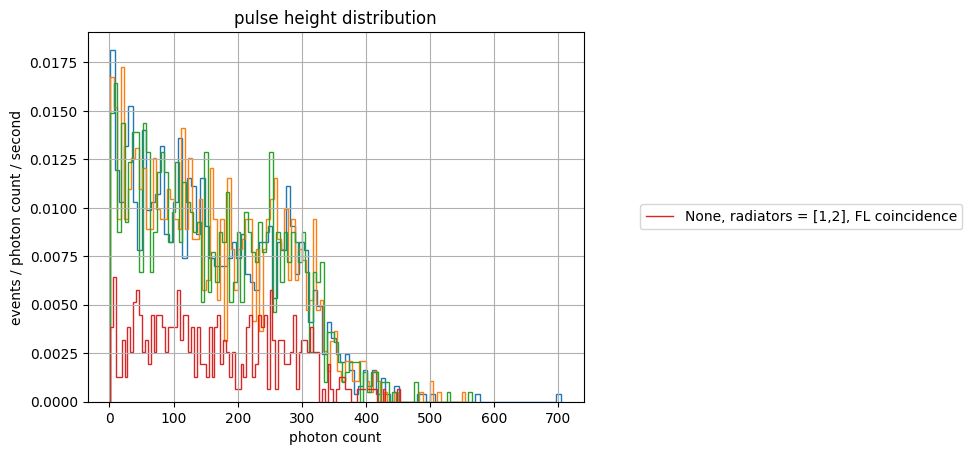

In [ ]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
multi_radiator_run.outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
multi_radiator_run.outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution()
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

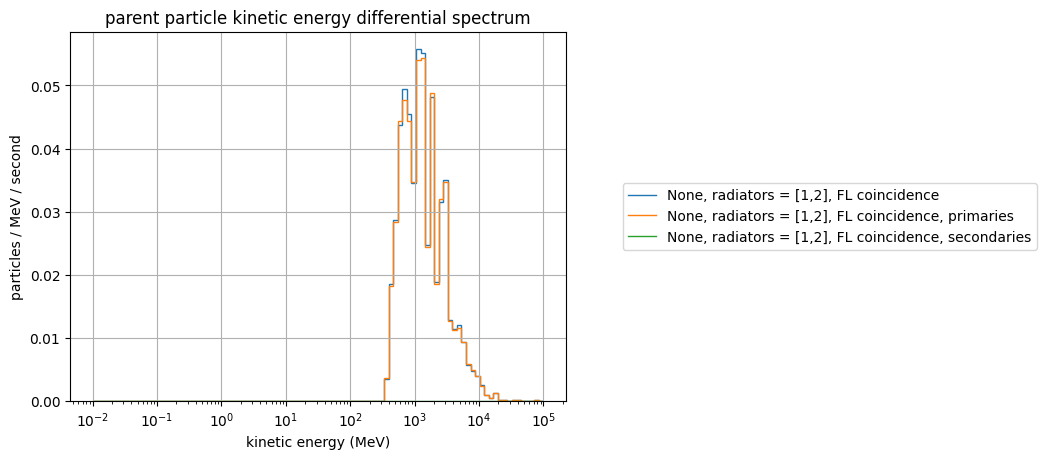

In [ ]:
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_differential_primary_spectra()
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()

In [ ]:
np.min(multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.kinetic_energies_series)

np.float32(336.08783)

In [ ]:
np.min(multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].primary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.kinetic_energies_series)

np.float32(336.08783)

In [ ]:
np.max(multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.kinetic_energies_series)

nan

In [ ]:
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"]

In [ ]:
single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

3.0861366056116473+/-0.09461158799625498

In [ ]:
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.98907197604659+/-0.05356125043165681

In [ ]:
single_radiator_run.outputted_tuple.DF_of_output_hits

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
2,328,-22,0.000005,3929.155273,0.000005,253.724335,0.124791
3,328,-22,0.000003,3929.155273,0.000003,357.449432,0.503187
4,328,-22,0.000006,3929.155273,0.000006,205.043808,0.011716
5,328,-22,0.000005,3929.155273,0.000005,267.045258,0.155733
6,328,-22,0.000003,3929.155273,0.000003,413.753448,0.597504
...,...,...,...,...,...,...,...
611102,9896,-22,0.000005,5258.892090,0.000005,241.227936,0.095765
611103,9896,-22,0.000004,5258.892090,0.000004,282.410767,0.191424
611104,9896,-22,0.000006,5258.892090,0.000006,210.039886,0.023321
611105,9896,-22,0.000003,5258.892090,0.000003,401.697754,0.598110


In [ ]:
multi_radiator_run.outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
1,231,-22,0.000006,0.000006,1775.489258,205.057632,0.011748
2,231,-22,NaN,0.000005,1775.489258,231.323059,0.072757
3,231,-22,0.000006,0.000006,1775.489258,217.168930,0.039880
4,231,-22,0.000005,0.000005,1775.489258,229.323914,0.068114
5,231,-22,0.000003,0.000003,1775.489258,396.672577,0.596348
...,...,...,...,...,...,...,...
628108,9841,-22,0.000004,0.000004,1005.647827,294.921448,0.342545
628109,9841,-22,0.000005,0.000005,1005.647827,241.787292,0.097064
628110,9841,-22,NaN,0.000006,1005.647827,219.752930,0.045882
628111,9841,-22,NaN,0.000003,1005.647827,366.902405,0.523899


In [ ]:
multi_radiator_run.outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].DF_of_output_hits

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
1,231,-22,0.000005,1776.028198,0.000005,228.119919,0.065317
2,231,-22,0.000002,1776.028198,0.000002,772.844238,0.071610
3,231,-22,0.000002,1776.028198,0.000002,738.163513,0.163064
4,231,-22,0.000005,1776.028198,0.000005,265.078308,0.151164
5,231,-22,0.000003,1776.028198,0.000003,441.826569,0.562907
...,...,...,...,...,...,...,...
610862,9841,-22,0.000006,1007.103577,0.000006,221.774719,0.050579
610863,9841,-22,0.000003,1007.103577,0.000003,385.625122,0.579641
610864,9841,-22,0.000002,1007.103577,0.000002,532.342041,0.465352
610865,9841,-22,0.000005,1007.103577,0.000005,259.040039,0.137139


In [ ]:
IRENE8_450_electrons_differential_shortened_single_orbit.head()

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
790,84.29629,156.896069,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
791,87.57371,156.643162,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
792,89.14890,336.407396,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
793,85.87130,336.147949,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
794,82.59322,335.896262,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


: 

In [ ]:
test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=1_000_001,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               save_DF_of_output_hits = True)

0it [00:00, ?it/s]

/tmp/ipykernel_84642/1299880705.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)


________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f47e2036840>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f47eebe2150>, Cherenkov_run_label=None, number_of_particles=1000001, number_of_radiators=2, save_DF_of_output_hits=True)


In [97]:
test_single_IRENE8_450_electrons_orbital_run_slight_short = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.columns[:-1]][IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=100_001,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               save_DF_of_output_hits = True)

1it [00:00, 17.02it/s]
1it [00:00, 1820.44it/s]


In [98]:
test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max], 
                                            particle_species="proton",
                                            number_of_particles_to_simulate=100_001, #100_000, #1_000_000,
                                            label="AP8 protons",
                                            threshold_photon_value=20.0,
                                            save_DF_of_output_hits = True)

1it [00:00,  7.00it/s]
1it [00:00, 1729.61it/s]


In [99]:
test_single_IRENE8_450_protons_orbital_run_slight_short = orbital_run(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.columns[:-1]][IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max], 
                                            particle_species="proton",
                                            number_of_particles_to_simulate=100_001, #100_000, #1_000_000,
                                            label="AP8 protons",
                                            threshold_photon_value=20.0,
                                            save_DF_of_output_hits = True)

1it [00:00, 12.90it/s]
1it [00:00, 1871.62it/s]


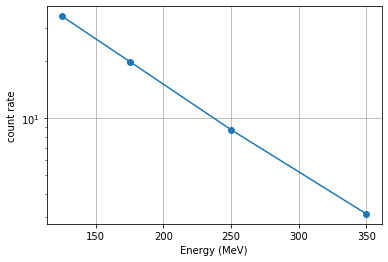

In [100]:
plt.plot(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max].columns[2:],
        IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max].values[0][2:],marker="o")
plt.yscale("log")
plt.xlabel("Energy (MeV)")
plt.ylabel("count rate")
plt.grid(True)

In [101]:
IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == 825]

,Latitude_deg,Longitude_deg,125.0,175.0,250.0,350.0
825,-19.81355,328.124158,36.086,21.116,9.3537,3.4778


In [102]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

96.02001221275555+/-12.097384438111238

In [103]:
test_single_IRENE8_450_protons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

3.6808064546027506+/-2.12511459739981

In [104]:
3 * test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

36.579052271525924+/-12.932647955286583

In [105]:
3 * test_single_IRENE8_450_protons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-3.6808064546027506

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


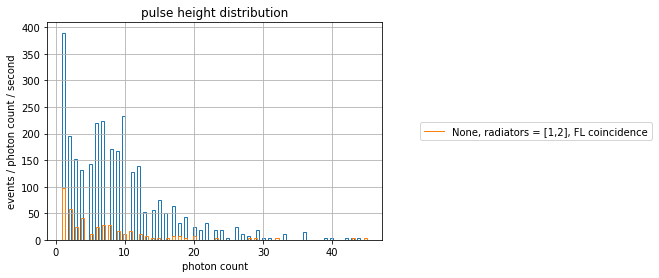

In [106]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


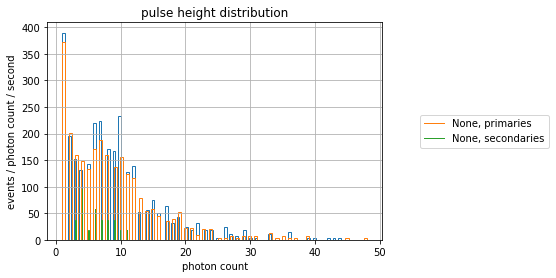

In [107]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


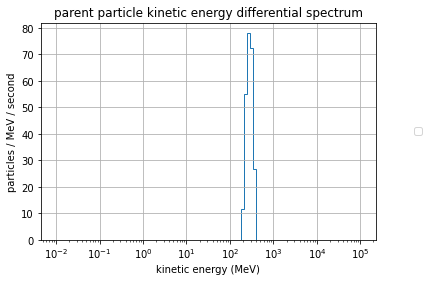

In [108]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_differential_primary_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


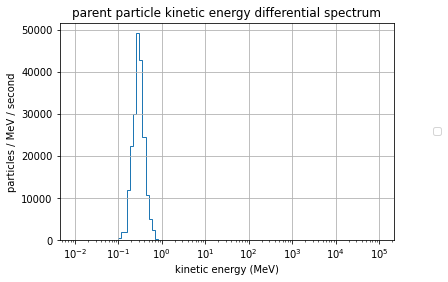

In [109]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_differential_primary_spectra()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


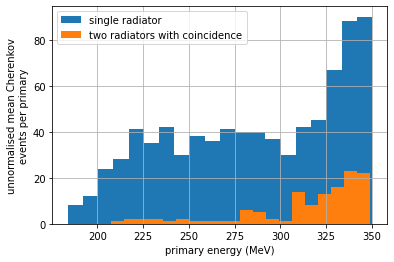

In [110]:
plt.hist(np.unique(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="single radiator")
plt.hist(np.unique(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="two radiators with coincidence")

plt.xlabel("primary energy (MeV)")
plt.ylabel("unnormalised mean Cherenkov\nevents per primary")
plt.grid(True)

plt.legend()

save_figure_for_paper("delta_proton_spectra")

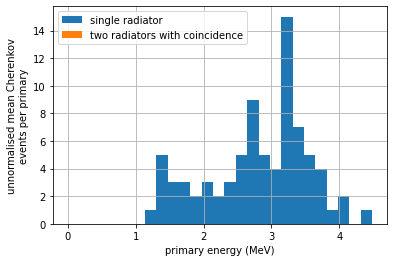

In [111]:
plt.hist(np.unique(test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="single radiator")
plt.hist(np.unique(test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="two radiators with coincidence")

plt.xlabel("primary energy (MeV)")
plt.ylabel("unnormalised mean Cherenkov\nevents per primary")
plt.grid(True)

plt.legend()

In [112]:
proton_test_DF_1 = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].DF_of_output_hits
proton_test_DF_1_PR = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.hits['FL1_tuple_fluence;1_PR']
proton_test_DF_1_RA = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits
proton_test_DF_1

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
4,300,-22,0.000005,334.726959,0.000005,228.268372,0.065662
5,300,-22,0.000006,334.726959,0.000006,220.950409,0.048664
6,300,-22,0.000004,334.726959,0.000004,276.268982,0.177158
7,300,-22,0.000006,334.726959,0.000006,211.698669,0.027174
8,300,-22,0.000006,334.726959,0.000006,212.064468,0.028023
...,...,...,...,...,...,...,...
55457,99778,-22,0.000002,225.096786,0.000002,732.229736,0.178712
55458,99778,-22,0.000003,225.096786,0.000003,436.137390,0.569160
55459,99778,-22,0.000002,225.096786,0.000002,527.583008,0.471103
55460,99778,-22,0.000005,225.096786,0.000005,242.316422,0.098293


In [113]:
proton_test_DF_2 = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL2_tuple_fluence;1_CK'].DF_of_output_hits
proton_test_DF_2_PR = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.hits['FL2_tuple_fluence;1_PR']
proton_test_DF_2_RA = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA2_tuple_interaction;1'].DF_of_output_hits
proton_test_DF_2

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
35,1825,-22,0.000006,346.217377,0.000006,200.913376,0.002122
36,1825,-22,0.000005,346.217377,0.000005,228.268234,0.065662
37,1825,-22,0.000005,346.217377,0.000005,268.478851,0.159063
38,1825,-22,0.000005,346.217377,0.000005,240.985641,0.095202
39,1825,-22,0.000006,346.217377,0.000006,216.679337,0.038743
...,...,...,...,...,...,...,...
56067,99563,-22,0.000005,303.594574,0.000005,233.986099,0.078943
56068,99563,-22,0.000004,303.594574,0.000004,311.018127,0.436602
56083,99614,-22,0.000006,314.294983,0.000006,202.185913,0.005077
56084,99614,-22,0.000006,314.294983,0.000006,203.714111,0.008627


In [114]:
proton_test_DF_coincidence = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].DF_of_output_hits
proton_test_DF_coincidence

,event_id,particle_id_x,kinetic_energy,primary_kinetic_energy_x,total_energy,wavelength_nm,Si_detection_probability,particle_id_y,primary_kinetic_energy_y,primarymomx,primarymomy,primarymomz,phi,theta,particle_id,primary_kinetic_energy
0,5335,-22,0.000005,339.268402,0.000005,232.222260,0.074846,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
1,5335,-22,0.000004,339.268402,0.000004,281.848663,0.190119,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
2,5335,-22,0.000004,339.268402,0.000004,283.992432,0.195098,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
3,5335,-22,0.000005,339.268402,0.000005,227.406387,0.063660,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
4,5335,-22,0.000006,339.268402,0.000006,219.452286,0.045184,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,99563,-22,0.000003,303.594574,0.000003,448.454041,0.555623,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574
4922,99563,-22,0.000003,303.594574,0.000003,404.904724,0.598110,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574
4923,99563,-22,0.000004,303.594574,0.000004,287.199890,0.230748,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574
4924,99563,-22,0.000002,303.594574,0.000002,667.565491,0.302123,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574


In [115]:
proton_test_DF_1.head()

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
4,300,-22,0.000005,334.726959,0.000005,228.268372,0.065662
5,300,-22,0.000006,334.726959,0.000006,220.950409,0.048664
6,300,-22,0.000004,334.726959,0.000004,276.268982,0.177158
7,300,-22,0.000006,334.726959,0.000006,211.698669,0.027174
8,300,-22,0.000006,334.726959,0.000006,212.064468,0.028023


In [116]:
proton_test_DF_2.head()

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
35,1825,-22,0.000006,346.217377,0.000006,200.913376,0.002122
36,1825,-22,0.000005,346.217377,0.000005,228.268234,0.065662
37,1825,-22,0.000005,346.217377,0.000005,268.478851,0.159063
38,1825,-22,0.000005,346.217377,0.000005,240.985641,0.095202
39,1825,-22,0.000006,346.217377,0.000006,216.679337,0.038743


In [117]:
proton_test_DF_1[proton_test_DF_1["event_id"].isin(proton_test_DF_2["event_id"])]["event_id"].unique()

array([ 5335,  5665,  5980,  8942, 12674, 18112, 25444, 25702, 25703,
       33973, 34355, 51056, 51077, 62073, 65285, 65540, 66636,  5453,
        5488,  5500,  7534, 15020, 17307, 20651, 26220, 26267, 31750,
       36113, 36398, 36463, 36526, 36631, 38791, 42085, 70284, 71554,
       71559,   604,   645,  3247,  9727, 14088, 18657, 25280, 31116,
       31141, 35435, 37462, 43080, 57130, 57289, 70457, 72678,  2083,
       14252, 20917, 22019, 32741, 32879, 32954, 32986, 36242, 42907,
       47734, 49825, 66244, 72853, 12194, 12235, 13458, 34075, 39395,
       41663, 43733, 43742, 14224, 18810, 21067, 25155, 28850, 29013,
       29035, 41165, 43291, 47475, 47487, 55233, 56382, 58426, 59683,
       61860, 69632, 73727, 78312,  1918,  4201, 12735, 12792, 33553,
       35985, 44687, 44708, 45836, 51234, 53342, 60029, 61007, 64581,
       64604, 67854, 74813, 78875, 80158,  8244,  8516, 16760, 69052,
       74349, 74370, 79638, 79964,   165,  6102, 10200, 21827, 22600,
       28704, 33326,

In [118]:
len(proton_test_DF_coincidence["event_id"].unique())

213

In [119]:
len(proton_test_DF_1["event_id"].unique())

1141

In [120]:
proton_test_DF_2[proton_test_DF_2["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
2168,33973,-22,0.000006,313.11084,0.000006,206.544006,0.015200
2169,33973,-22,0.000006,313.11084,0.000006,210.872116,0.025254


In [121]:
proton_test_DF_2_RA[proton_test_DF_2_RA["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
1969,33973,-22,0.000006,0.000006,299.494202,210.872116,0.025254
1970,33973,-22,0.000006,0.000006,299.494202,206.544006,0.015200


In [122]:
proton_test_DF_2_PR[proton_test_DF_2_PR["event_id"] == 33973]

,event_id,particle_id,primary_kinetic_energy,primarymomx,primarymomy,primarymomz,phi,theta
2166,33973,2212,313.11084,-552.808838,-20.16408,-616.117249,-177.911011,138.081131


In [123]:
proton_test_DF_1[proton_test_DF_1["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
1816,33973,-22,0.000006,313.11084,0.000006,207.367538,0.017113
1817,33973,-22,0.000006,313.11084,0.000006,214.596664,0.033905
1818,33973,-22,0.000005,313.11084,0.000005,227.251831,0.063301
1819,33973,-22,0.000006,313.11084,0.000006,203.531631,0.008203


In [124]:
proton_test_DF_1_RA[proton_test_DF_1_RA["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
17546,33973,-22,NaN,0.000006,303.445679,203.531631,0.008203
17547,33973,-22,NaN,0.000005,303.445679,227.251831,0.063301
17548,33973,-22,NaN,0.000006,303.445679,214.596664,0.033905
17549,33973,-22,0.000006,0.000006,303.445679,207.367538,0.017113


In [125]:
proton_test_DF_1[proton_test_DF_1["event_id"].isin(proton_test_DF_2["event_id"])]

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
217,5335,-22,0.000005,339.268402,0.000005,232.222260,0.074846
218,5335,-22,0.000004,339.268402,0.000004,281.848663,0.190119
219,5335,-22,0.000004,339.268402,0.000004,283.992432,0.195098
220,5335,-22,0.000005,339.268402,0.000005,227.406387,0.063660
221,5335,-22,0.000006,339.268402,0.000006,219.452286,0.045184
...,...,...,...,...,...,...,...
55403,99563,-22,0.000003,303.594574,0.000003,448.454041,0.555623
55404,99563,-22,0.000003,303.594574,0.000003,404.904724,0.598110
55405,99563,-22,0.000004,303.594574,0.000004,287.199890,0.230748
55406,99563,-22,0.000002,303.594574,0.000002,667.565491,0.302123


In [126]:
pd.merge(proton_test_DF_1[proton_test_DF_1["event_id"].isin(proton_test_DF_2["event_id"])],proton_test_DF_1_PR, on='event_id',how="inner")

,event_id,particle_id_x,kinetic_energy,primary_kinetic_energy_x,total_energy,wavelength_nm,Si_detection_probability,particle_id_y,primary_kinetic_energy_y,primarymomx,primarymomy,primarymomz,phi,theta
0,5335,-22,0.000005,339.268402,0.000005,232.222260,0.074846,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176
1,5335,-22,0.000004,339.268402,0.000004,281.848663,0.190119,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176
2,5335,-22,0.000004,339.268402,0.000004,283.992432,0.195098,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176
3,5335,-22,0.000005,339.268402,0.000005,227.406387,0.063660,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176
4,5335,-22,0.000006,339.268402,0.000006,219.452286,0.045184,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,99563,-22,0.000003,303.594574,0.000003,448.454041,0.555623,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973
4922,99563,-22,0.000003,303.594574,0.000003,404.904724,0.598110,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973
4923,99563,-22,0.000004,303.594574,0.000004,287.199890,0.230748,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973
4924,99563,-22,0.000002,303.594574,0.000002,667.565491,0.302123,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973


In [127]:
proton_test_DF_coincidence.dropna()

,event_id,particle_id_x,kinetic_energy,primary_kinetic_energy_x,total_energy,wavelength_nm,Si_detection_probability,particle_id_y,primary_kinetic_energy_y,primarymomx,primarymomy,primarymomz,phi,theta,particle_id,primary_kinetic_energy
0,5335,-22,0.000005,339.268402,0.000005,232.222260,0.074846,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
1,5335,-22,0.000004,339.268402,0.000004,281.848663,0.190119,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
2,5335,-22,0.000004,339.268402,0.000004,283.992432,0.195098,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
3,5335,-22,0.000005,339.268402,0.000005,227.406387,0.063660,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
4,5335,-22,0.000006,339.268402,0.000006,219.452286,0.045184,2212,339.268402,-43.767639,642.056213,581.036377,93.899696,47.922176,-22,339.268402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,99563,-22,0.000003,303.594574,0.000003,448.454041,0.555623,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574
4922,99563,-22,0.000003,303.594574,0.000003,404.904724,0.598110,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574
4923,99563,-22,0.000004,303.594574,0.000004,287.199890,0.230748,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574
4924,99563,-22,0.000002,303.594574,0.000002,667.565491,0.302123,2212,303.594574,350.607635,-48.864216,732.505859,-7.934209,25.792973,-22,303.594574


In [128]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
1,1241,-22,NaN,0.000005,336.868103,265.834686,0.152921
2,1241,-22,0.000006,0.000006,336.868103,218.758774,0.043573
3,1241,-22,NaN,0.000005,336.868103,261.906128,0.143796
4,1241,-22,NaN,0.000006,336.868103,202.884201,0.006699
5,1241,-22,NaN,0.000005,336.868103,258.078552,0.134905
...,...,...,...,...,...,...,...
43942,99778,-22,NaN,0.000005,0.254410,254.184845,0.125861
43943,99778,-22,NaN,0.000005,0.254410,229.975815,0.069628
43944,99778,-22,0.000006,0.000006,0.254410,204.719955,0.010964
43947,99778,-22,NaN,0.000003,0.189640,396.213043,0.596136


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


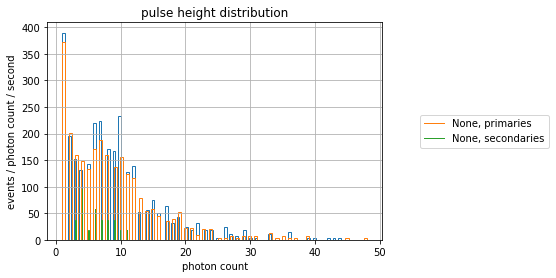

In [129]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


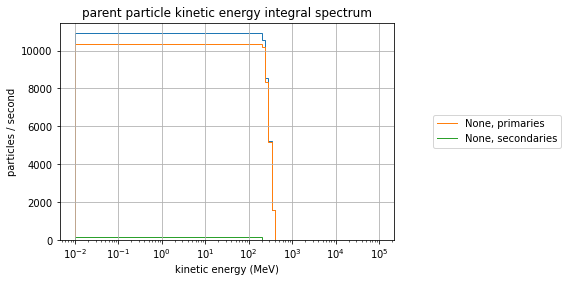

In [130]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_integral_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_integral_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_integral_primary_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 1000)

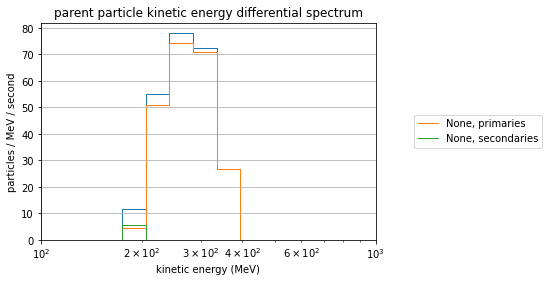

In [131]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
plt.xlim([100,1000])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


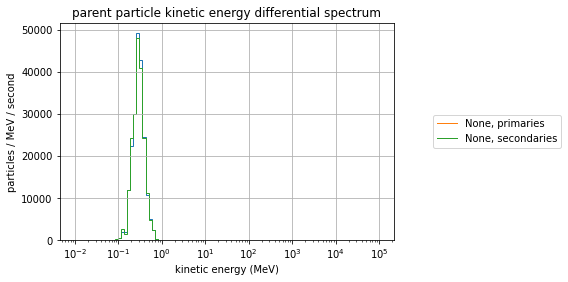

In [132]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()

(0.01, 10)

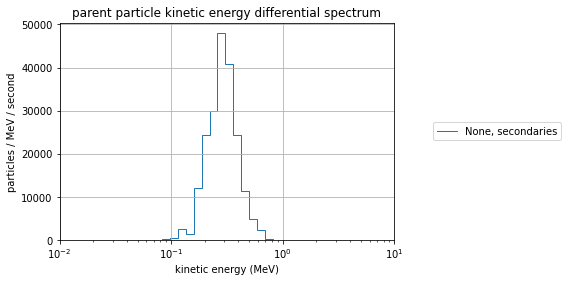

In [133]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
plt.xlim([0.01,10])

In [134]:
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
#test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
#test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
#plt.xlim([100,1000])

281.9729919433594
284.6393737792969


In [135]:
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].primary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))

0.32202258706092834
333.5703125
0.31138157844543457


In [136]:
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.75))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.25))

0.3763580918312073
0.31138157844543457
0.26145678758621216


In [137]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].DF_of_output_hits["event_id"].sort_values().unique()

array([  165,   202,   300, ..., 99579, 99778, 99984], dtype=int32)

In [138]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL2_tuple_fluence;1_CK'].DF_of_output_hits["event_id"].sort_values().unique()

array([   89,   126,   127, ..., 99614, 99624, 99716], dtype=int32)

In [139]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits["event_id"].sort_values().unique()

array([  165,   202,   300, ..., 99579, 99778, 99984], dtype=int32)

In [140]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA2_tuple_interaction;1'].DF_of_output_hits["event_id"].sort_values().unique()

array([   89,   126,   127, ..., 99614, 99624, 99716], dtype=int32)

In [141]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

96.02001221275555+/-12.097384438111238

In [142]:
3 * test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

36.579052271525924+/-12.932647955286583

In [143]:
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

217.04362293346583+/-42.565756486100646

In [144]:
3 * test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-25.043494953861444

In [145]:
test_single_IRENE8_450_electrons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

166.95513043107167+/-118.0551048816953

In [146]:
3 * test_single_IRENE8_450_electrons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-250.4326956466075

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


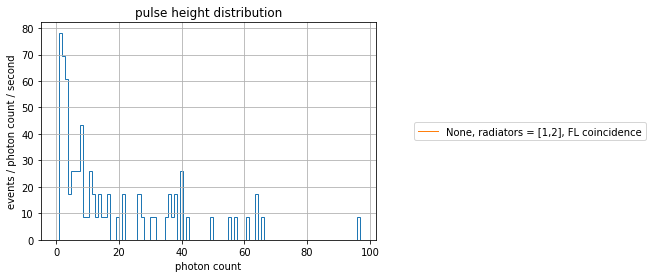

In [147]:
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


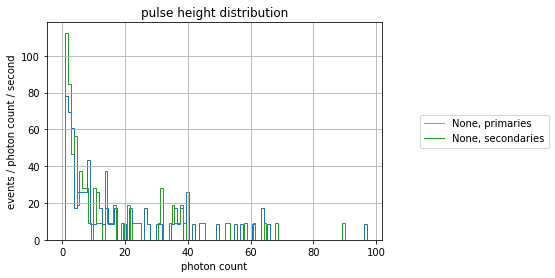

In [148]:
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

## Running for selected trapped electron regions

In [149]:
IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == 843]

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
843,-79.1385,323.613636,11178.0,5593.6,2407.4,1359.56,866.44,436.8,169.724,104.668,...,29.672,17.1352,10.8192,12.5496,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [150]:
high_stats_test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == 843], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=100_000_000,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

1it [00:01,  1.13s/it]
1it [00:00, 1326.89it/s]


In [151]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict

{843: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f28d2f6e0a0>}

In [152]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.0020979053085848067

In [153]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.0020979053085848067

In [154]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.estimated_number_of_incoming_particles

100000000

In [155]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].number_of_events_simulated

100000000

In [156]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.number_of_events_simulated

100000000

In [157]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843]

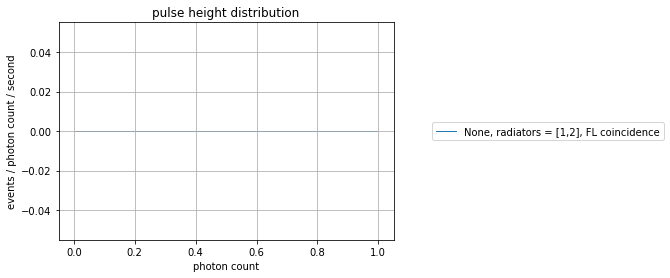

In [158]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [159]:
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=100_000_000, #100_000_000,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

1it [00:00,  1.32it/s]


In [160]:
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.08347839999118799

In [161]:
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_horns_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=10_000_000, #100_000_000,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

1it [00:00,  1.18it/s]


In [162]:
horns_max_elec_coincidence_counts = horns_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)
horns_max_elec_coincidence_counts

0.0+/-0.4166206271187851

## Running for selected trapped proton regions

In [163]:
IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == 843]

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.6499999999999999,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
843,-79.1385,323.613636,13188.2,5441.6,1622.53,244.996,43.574,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [164]:
high_stats_test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == 843], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=1_000_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

1it [00:00,  8.28it/s]


In [165]:
high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.042254842164198295

In [166]:
IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == 843]

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.6499999999999999,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
843,-79.1385,323.613636,13188.2,5441.6,1622.53,244.996,43.574,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [167]:
index_for_SAA_max

826

In [168]:
SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_SAA_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=1_000_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

1it [00:00,  4.99it/s]


In [169]:
SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

100.54338614390714+/-9.81202978723315

In [170]:
SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

14.36334087770102+/-3.708598667682418

In [171]:
test_orbital_run_1 = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_SAA_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=10_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

test_orbital_run_2 = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_SAA_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=10_001,
                                               label="AP8 protons 2",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

test_orbital_run_3 = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_SAA_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=10_002,
                                               label="AP8 protons 2",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

1it [00:00, 16.15it/s]
1it [00:00, 17.82it/s]
1it [00:00, 11.62it/s]


In [172]:
test_orbital_run_1.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=0.0)

1340.5784819187618+/-358.2846699586808

In [173]:
test_orbital_run_2.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=0.0)

1531.936499971445+/-382.98412499286127

In [174]:
test_orbital_run_3.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=0.0)

1340.3104198347949+/-358.2130273532102

In [175]:
horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run_dict = {}
for index, n_particles_to_simulate in enumerate(range(10_000_000,10_000_010)):
    horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run_dict[index] = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_horns_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=n_particles_to_simulate,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

1it [00:00, 16.52it/s]
1it [00:00, 15.32it/s]
1it [00:00, 16.88it/s]
1it [00:00, 13.35it/s]
1it [00:00, 15.47it/s]
1it [00:00, 14.82it/s]
1it [00:00, 16.36it/s]
1it [00:00, 14.96it/s]
1it [00:00, 15.27it/s]
1it [00:00, 16.55it/s]


In [176]:
pd.Series(horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run_dict).apply(lambda x:x.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0))

0    0+/-7
1    0+/-7
2    0+/-7
3    0+/-7
4    0+/-7
5    0+/-7
6    0+/-7
7    0+/-7
8    0+/-7
9    0+/-7
dtype: object

In [177]:
horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_horns_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=10_000_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

1it [00:00, 12.95it/s]


In [178]:
horns_max_prot_coincidence_counts = horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0) / 10
horns_max_prot_coincidence_counts

0.0+/-0.7129819707734761

In [179]:
horns_max_prot_coincidence_counts + horns_max_elec_coincidence_counts

0.0+/-0.8257820763306017

In [180]:
horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-7.129819707734761

## Running across multiple rigidities

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


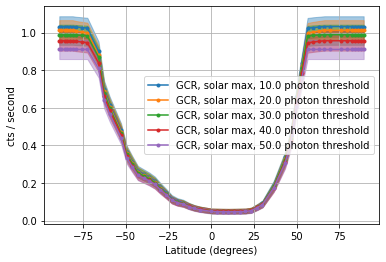

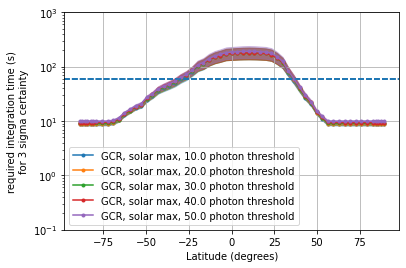

In [181]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                       datetime_to_use=SRT.datetime_for_GCR_solar_max, 
                       input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                       label = f"GCR, solar max, {photon_threshold} photon threshold", 
                       number_of_radiators=2, 
                       threshold_photon_value=photon_threshold).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                       datetime_to_use=SRT.datetime_for_GCR_solar_max,
                       input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                       label = f"GCR, solar max, {photon_threshold} photon threshold", 
                       number_of_radiators=2,
                       threshold_photon_value=photon_threshold).plot_int_time_array_vs_longitude_0()
plt.legend()

In [182]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

multi_rigidity_GLE21 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label="GLE21 protons",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

multi_rigidity_GLE05 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label="GLE05 protons",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


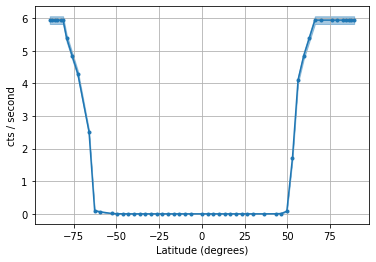

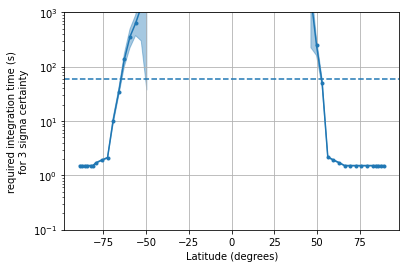

In [183]:
multi_rigidity_GLE21.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE21.plot_int_time_array_vs_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


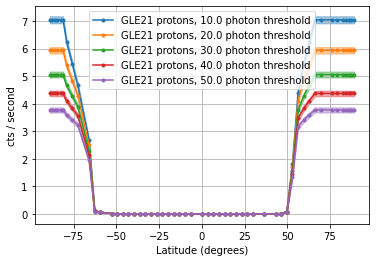

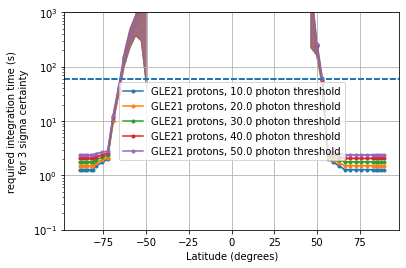

In [184]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


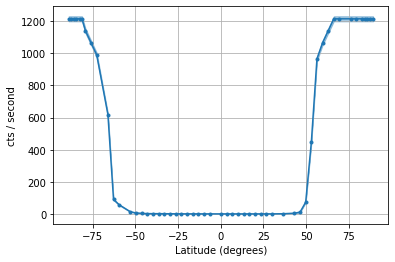

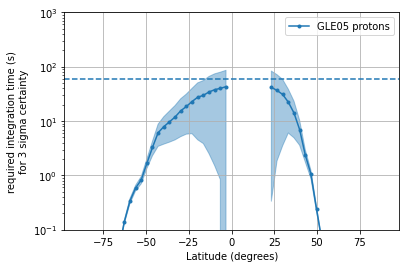

In [185]:
multi_rigidity_GLE05.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE05.plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


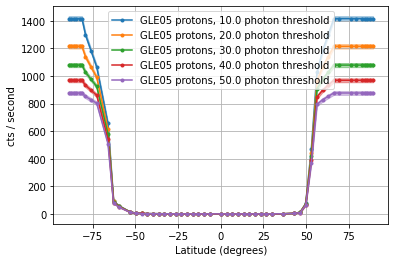

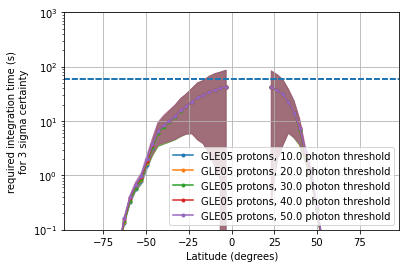

In [186]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

In [187]:
spacecraft_coords_DF

,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


In [188]:
def soft_divide(numerator, denominator):

    try:
        return numerator / denominator
    except ZeroDivisionError:
        return ufloat(0.0,0.0)

In [189]:
def calculate_int_time_functional(x_value, signal_flux_func, list_of_background_flux_functions, sigma=3):

    signal_flux = signal_flux_func(x_value)
    signal_flux_modified = np.array([(signal if signal.n != 0.0 else ufloat(np.nan,np.nan)) for signal in signal_flux])

    numerator = (signal_flux_modified + sum([background_flux_func(x_value) for background_flux_func in list_of_background_flux_functions]))

    return (sigma**2) * numerator / (signal_flux_modified**2) 

In [190]:
def plot_world_map():
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize=(12, 6))
    worldmap.plot(color="lightgrey", ax=ax)

In [191]:
def long_east_to_west(longitude_east):

    if longitude_east > 180:
        output_longitude = longitude_east - 360.0
    else:
        output_longitude = longitude_east

    return output_longitude

In [192]:
class full_orbit_background():

    def __init__(self, 
                 DF_of_coordinates:pd.DataFrame, 
                 list_of_multi_rigidity_runs = [],
                 list_of_orbit_background_runs = [],
                 label=None,
                 datetime_for_rigidities = SRT.datetime_for_GCR_solar_max):

        self.DF_of_coordinates = DF_of_coordinates
        self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index
        self.list_of_multi_rigidity_runs = list_of_multi_rigidity_runs
        self.list_of_orbit_background_runs = list_of_orbit_background_runs
        self.label = label

        self.rigidities_for_coordinates = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = DF_of_coordinates[["Latitude_deg","Longitude_deg"]].values,
                                            dateAndTime=datetime_for_rigidities,cache=True)
        self.rigidities_for_coordinates = self.rigidities_for_coordinates[
            #np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -81.194370) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 72.753770) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -56.147930) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -69.295260) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 39.842640) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 42.992710) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -3.229399) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 33.233800)]  
        self.rigidities_for_coordinates.iloc[5] = self.rigidities_for_coordinates.iloc[4]

        self.rig_interp_list = []
        for multi_rigidity_run in list_of_multi_rigidity_runs:
            count_rate_DF = pd.DataFrame(self.rigidities_for_coordinates["Reffective"].copy())
            count_rate_DF["count_rate"] = multi_rigidity_run.rig_interp(count_rate_DF["Reffective"])

            list_of_sub_coordinates = []
            for index, row in count_rate_DF.reset_index().iterrows():
                relevant_coord = self.DF_of_coordinates[self.DF_of_coordinates["Latitude_deg"] == row["initialLatitude"]]
                list_of_sub_coordinates.append(relevant_coord)
            DF_of_sub_coordinates = pd.concat(list_of_sub_coordinates).reset_index()
            count_rate_DF = pd.concat([count_rate_DF.reset_index(),DF_of_sub_coordinates],axis=1).sort_values(by="index")
            count_rate_DF.label = multi_rigidity_run.label

            self.rig_interp_list.append(count_rate_DF)


        self.dict_of_interp_functions = {}
        dict_index = 0
        for interped_rig in self.rig_interp_list:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=interped_rig["index"],y=interped_rig["count_rate"])
            self.dict_of_interp_functions[dict_index].label = interped_rig.label
            dict_index += 1

        for orbit_background_run in self.list_of_orbit_background_runs:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=orbit_background_run.run_dict_event_counts.index,
                                                            y=orbit_background_run.run_dict_event_counts.values)
            self.dict_of_interp_functions[dict_index].label = orbit_background_run.label
            dict_index += 1

    def plot_cosmic_particles(self, xcol_to_plot_against="orbital_step", indicies=":", error_bar_function=plt.errorbar):

        if indicies == ":":
            rig_interp_list = self.rig_interp_list
        else:
            rig_interp_list = [self.rig_interp_list[indicies]]
        
        for interped_rig in rig_interp_list:
            #interped_rig.plot("index","count_rate",ax=plt.gca())
            error_bar_function(interped_rig[xcol_to_plot_against],
                     interped_rig["count_rate"].apply(lambda x:x.n),
                     interped_rig["count_rate"].apply(lambda x:x.std_dev),
                     label=interped_rig.label)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_count_rates(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        for orbit_background_run in self.list_of_orbit_background_runs:
            orbit_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_cosmic_vs_trapped(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        first_sum = True
        for orbit_background_run in self.list_of_orbit_background_runs:
            if first_sum is True:
                total_background_run = orbit_background_run
                first_sum=False
            else:
                total_background_run = total_background_run + orbit_background_run
                
        total_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        if xcol_to_plot_against is "Latitude_deg":
            plt.xlabel("Latitude (degrees)")
        else:
            plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_int_time(self, signal_index=0, xcol_to_plot_against="orbital_step"):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates[xcol_to_plot_against]

        #plt.plot(self.DF_of_coordinates.index, output_int_time_values)
        # plt.errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
        #              [time_value.n for time_value in output_int_time_values],
        #              [time_value.std_dev for time_value in output_int_time_values])
        
        fill_between_errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
                     [time_value.n for time_value in output_int_time_values],
                     [time_value.std_dev for time_value in output_int_time_values],
                     label=signal_interp_function.label)

        plt.axhline(60,ls="--")
        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")
        plt.grid(True)
        plt.legend()

        #return output_int_time_values

    def plot_spacecraft_trajectory(self):

        plot_world_map()

        self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)

        sns.scatterplot(data=self.DF_of_coordinates,x="Longitude_east_deg",y="Latitude_deg")

    def get_count_rate_info(self, signal_index=0):

        print(f"polar count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_polar]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"horns count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_horns_max]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"SAA count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_SAA_max]['count_rate'].iloc[0]}".replace("+/-","±"))

    
    def get_int_time_info(self, signal_index=0, account_for_background=True):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        if account_for_background==True:
            background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]
        else:
            background_interp_function_list = [lambda x:0]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates["orbital_step"]

        print(f"polar int time is: {output_int_time_values[xvals_to_plot_against == index_for_polar][0]}".replace("+/-","±"))
        print(f"horns int time is: {output_int_time_values[xvals_to_plot_against == index_for_horns_max][0]}".replace("+/-","±"))
        print(f"SAA int time is: {output_int_time_values[xvals_to_plot_against == index_for_SAA_max][0]}".replace("+/-","±"))
        

<>:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_4661/100066915.py:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if xcol_to_plot_against is "Latitude_deg":


In [193]:
default_trajectory_DF = spacecraft_coords_DF.iloc[790:850]
default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)

/tmp/ipykernel_4661/3269862290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)


/tmp/ipykernel_4661/100066915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_4661/100066915.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


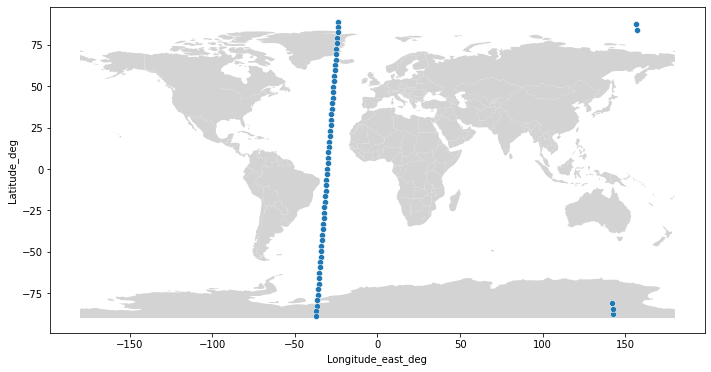

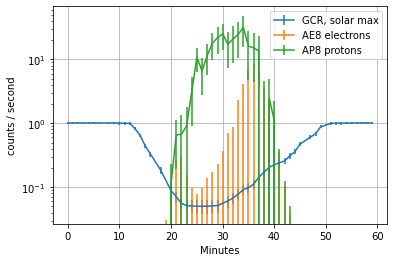

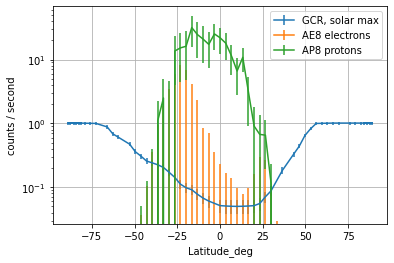

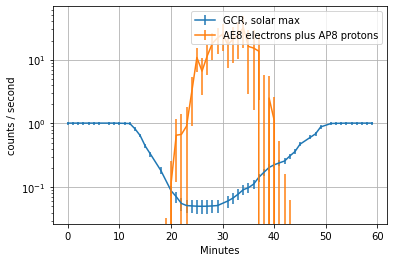

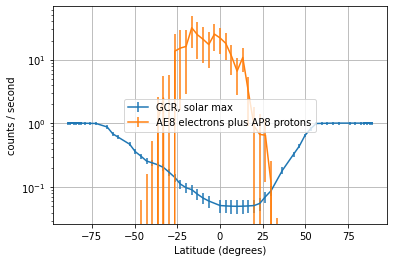

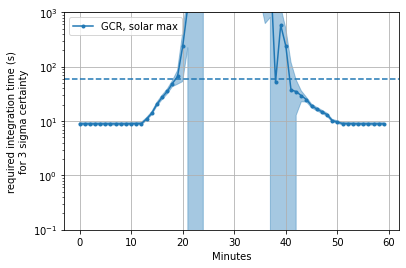

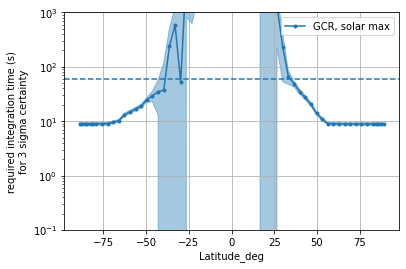

In [194]:
GCR_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run],
                                              label="GCR protons, solar max")
GCR_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg")#,error_bar_function=fill_between_errorbar)
plt.figure()
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()

GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")

plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")


/tmp/ipykernel_4661/100066915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_4661/100066915.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


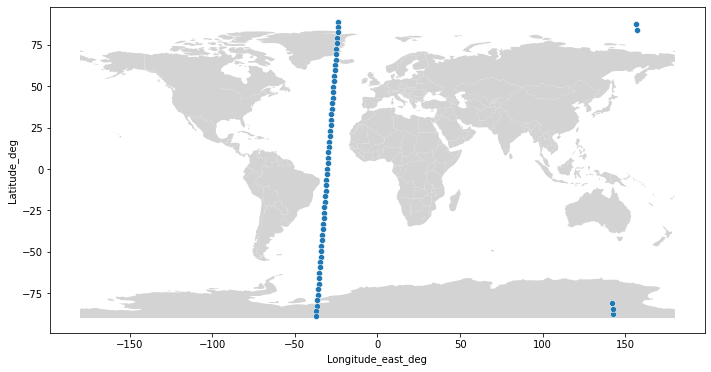

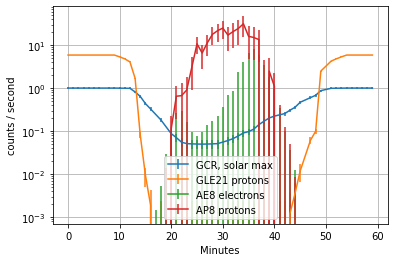

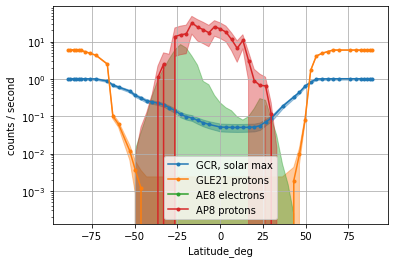

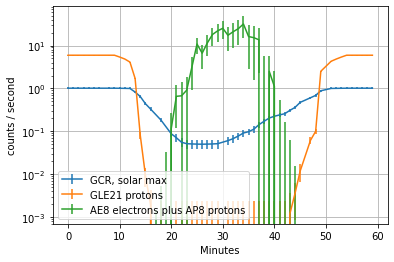

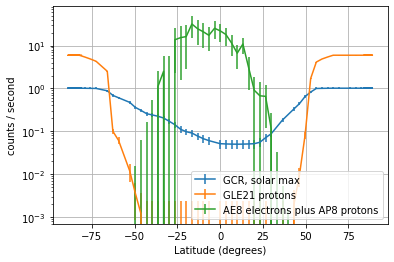

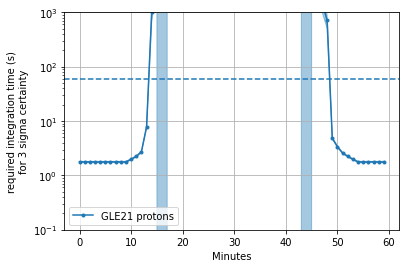

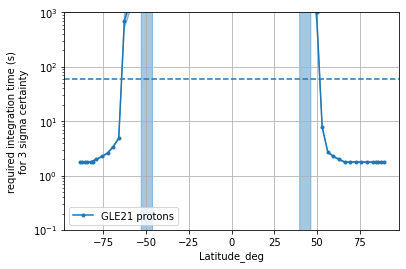

In [195]:
GLE21_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE21],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])
GLE21_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg",error_bar_function=fill_between_errorbar)
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

/tmp/ipykernel_4661/100066915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_4661/100066915.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


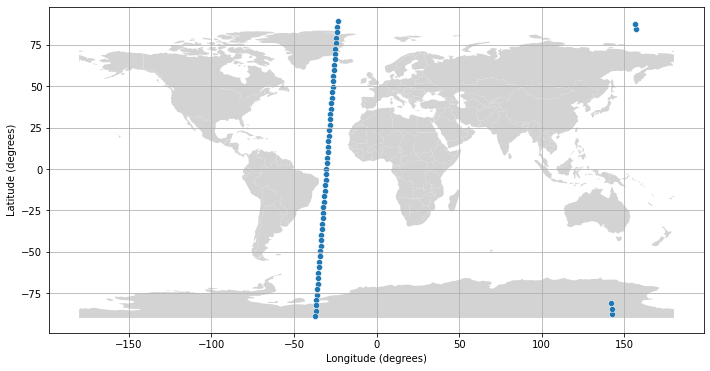

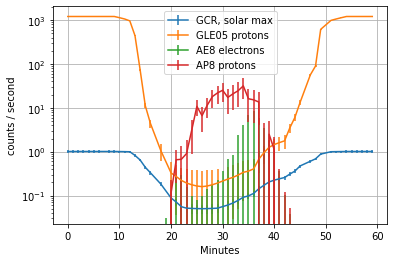

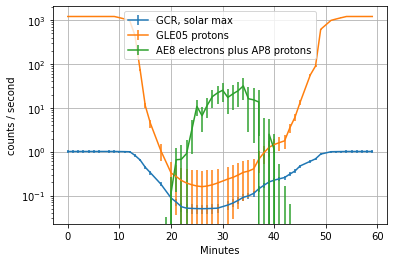

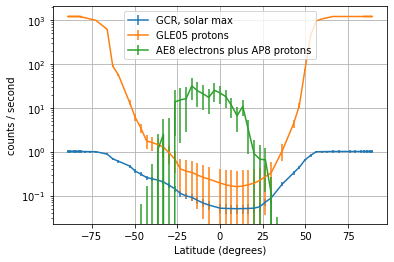

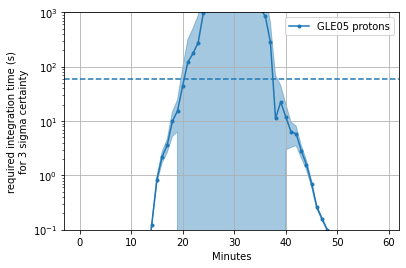

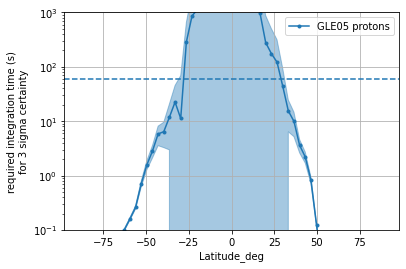

In [196]:
GLE05_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE05],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])

GLE05_orbit_background.plot_spacecraft_trajectory()
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.grid(True)
plt.figure()
GLE05_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

In [1]:
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg", error_bar_function=fill_between_errorbar)
GLE21_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)
GLE05_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)

alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()

plt.legend(["GCR protons, solar max", "_",
            "AE8 electrons plus AP8 protons", "_",
            "GLE21 protons", "_",
            "GLE05 protons", "_",
            "GCR alphas, solar max"])

plt.xlabel("Latitude (degrees)")

plt.ylim([1e-3,1e6])

save_figure_for_paper("GLEs_output_coincidence")


NameError: name 'GCR_orbit_background' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


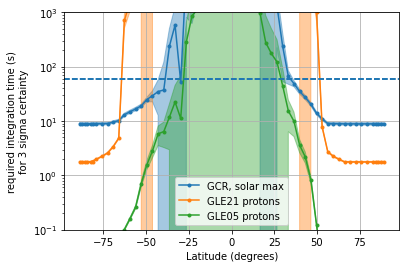

In [198]:
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

plt.xlabel("Latitude (degrees)")

save_figure_for_paper("GLEs_req_int_time_coincidence")

In [199]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


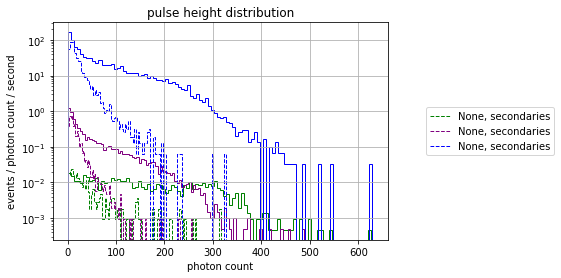

In [200]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution(color="green")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="green",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution(color="purple")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="purple",ls="--")

GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution(color="blue")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

plt.yscale("log")

In [201]:
def plot_phd_modified(pulse_height_distribution,nbins=100,return_vals=False,**xargs):

        # self.pulse_height_values["Si_detection_probability"].hist(bins=100,**xargs)
        
        hist_values = np.histogram(pulse_height_distribution.pulse_height_values,bins=nbins)

        normalised_counts = hist_values[0] / pulse_height_distribution.estimated_observation_time_in_seconds
        plt.stairs(normalised_counts / np.diff(hist_values[1]),hist_values[1],label=pulse_height_distribution.label,**xargs)
        plt.grid(True)
        plt.xlabel("photon count")
        plt.ylabel("events / photon count / second")
        plt.title("pulse height distribution")
        plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))

        if return_vals is True:
                return np.transpose(( hist_values[1][:-1], normalised_counts / np.diff(hist_values[1])))

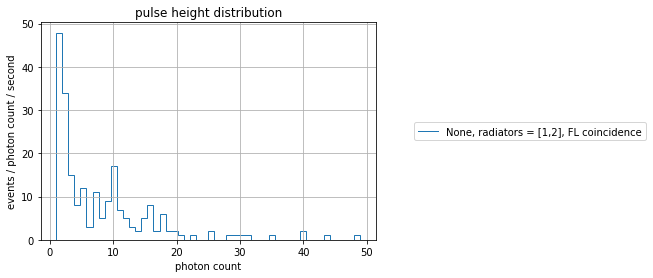

In [202]:
plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo,nbins=50)

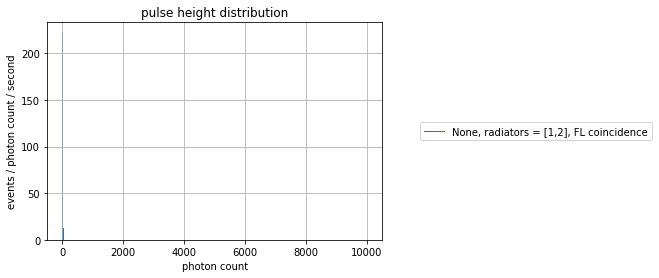

In [203]:
plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo,nbins=np.geomspace(1e0,1e4,50))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


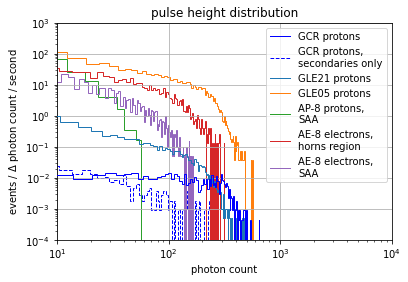

In [204]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution(color="blue",zorder=10)
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution(zorder=9)
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()

plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo,nbins=10)
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()

plt.legend(["GCR protons","GCR protons,\nsecondaries only","GLE21 protons","GLE05 protons","AP-8 protons,\nSAA","AE-8 electrons,\nhorns region","AE-8 electrons,\nSAA"])

plt.yscale("log")
plt.xscale("log")

plt.xlim([1e1,1e4])
plt.ylim([1e-4,1e3])

plt.ylabel(r"events / $\Delta$ photon count / second")

save_figure_for_paper("GLE_pulse_height")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([[1.00000000e+00, 6.71566731e-01],
       [2.72631579e+01, 1.92600954e-01],
       [5.35263158e+01, 1.21847734e-01],
       [7.97894737e+01, 8.81470969e-02],
       [1.06052632e+02, 6.55894123e-02],
       [1.32315789e+02, 4.67460452e-02],
       [1.58578947e+02, 3.19793681e-02],
       [1.84842105e+02, 2.34636157e-02],
       [2.11105263e+02, 1.30454080e-02],
       [2.37368421e+02, 7.51922820e-03],
       [2.63631579e+02, 4.43906243e-03],
       [2.89894737e+02, 1.81186222e-03],
       [3.16157895e+02, 7.24744887e-04],
       [3.42421053e+02, 4.52965554e-04],
       [3.68684211e+02, 1.81186222e-04],
       [3.94947368e+02, 1.81186222e-04],
       [4.21210526e+02, 0.00000000e+00],
       [4.47473684e+02, 9.05931109e-05],
       [4.73736842e+02, 9.05931109e-05]])

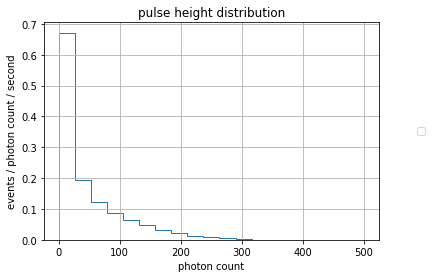

In [205]:
plot_phd_modified(GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo
,return_vals=True
,nbins=np.linspace(1,500,20))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([[1.00000000e+00, 9.28439264e+01],
       [2.72631579e+01, 3.25904063e+01],
       [5.35263158e+01, 2.33906641e+01],
       [7.97894737e+01, 1.84793433e+01],
       [1.06052632e+02, 1.38395428e+01],
       [1.32315789e+02, 1.14198189e+01],
       [1.58578947e+02, 8.60080068e+00],
       [1.84842105e+02, 7.85811316e+00],
       [2.11105263e+02, 5.11895379e+00],
       [2.37368421e+02, 3.81725416e+00],
       [2.63631579e+02, 2.03640128e+00],
       [2.89894737e+02, 1.06212302e+00],
       [3.16157895e+02, 5.66998002e-01],
       [3.42421053e+02, 2.39576621e-01],
       [3.68684211e+02, 1.59717747e-01],
       [3.94947368e+02, 1.19788310e-01],
       [4.21210526e+02, 3.99294368e-02],
       [4.47473684e+02, 5.59012115e-02],
       [4.73736842e+02, 1.59717747e-02]])

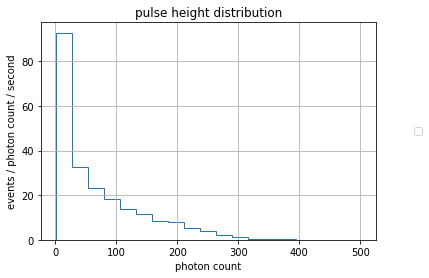

In [206]:
plot_phd_modified(GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo
,return_vals=True
,nbins=np.linspace(1,500,20))

In [207]:
1.84793433e+01 / 8.81470969e-02

209.64210904148337

In [208]:
2.03640128e+00 /  4.43906243e-03

458.7458077267907

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


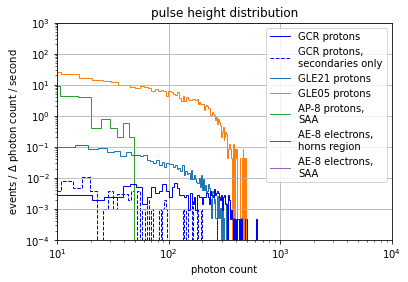

In [209]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution(color="blue",zorder=10)
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution(zorder=9)
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()

plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo,nbins=10)
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()

plt.legend(["GCR protons","GCR protons,\nsecondaries only","GLE21 protons","GLE05 protons","AP-8 protons,\nSAA","AE-8 electrons,\nhorns region","AE-8 electrons,\nSAA"])

plt.yscale("log")
plt.xscale("log")

plt.xlim([1e1,1e4])
plt.ylim([1e-4,1e3])

plt.ylabel(r"events / $\Delta$ photon count / second")

save_figure_for_paper("GLE_pulse_height_coincidence")

In [210]:
SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo

In [211]:
dir(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'])

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'determine_pulse_height_distributions',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 'plot_pulse_height_distribution',
 'plot_smoother_pulse_height_distribution',
 'primary_particle_Cherenkov_tuple',
 'pulse_height_distribution_averaged_method',
 'pulse_height_distribution_monte_carlo',
 'random_reject_pde',
 'secondary_particle_Cherenkov_tuple',
 'threshold_primary_energy']

In [231]:
print(GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

print(GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 100.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 100.0))


207.9+/-2.8
274+/-6


In [212]:
print(100 * GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

16.7+/-1.4
15.5+/-0.5
13.49+/-0.29


(0.0001, 10000.0)

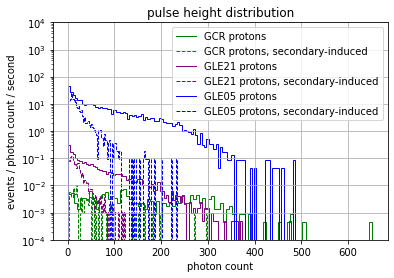

In [213]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].plot_pulse_height_distribution(color="green")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="green",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].plot_pulse_height_distribution(color="purple")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="purple",ls="--")

GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].plot_pulse_height_distribution(color="blue")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

plt.yscale("log")

plt.legend([
    "GCR protons",
    "GCR protons, secondary-induced",
    "GLE21 protons",
    "GLE21 protons, secondary-induced",
    "GLE05 protons",
    "GLE05 protons, secondary-induced",
])

plt.ylim([1e-4,1e4])

In [214]:
print(100 * GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

5.75+/-0.10
5.75+/-0.05
5.269+/-0.030


In [215]:
GCR_orbit_background.get_count_rate_info(signal_index=0)

polar count rate is: 1.01±0.05
horns count rate is: 0.88±0.05
SAA count rate is: 0.112±0.018


In [216]:
GLE21_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 5.94±0.12
horns count rate is: 2.51±0.07
SAA count rate is: 0.0000±0.0024


In [217]:
GLE05_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 1215±16
horns count rate is: 619±10
SAA count rate is: 0.41±0.29


In [218]:
GCR_orbit_background.get_int_time_info(signal_index=0)

polar int time is: 8.9±0.5
horns int time is: 10.2±0.6
SAA int time is: (1.1±1.0)e+04


In [219]:
GLE21_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 1.77±0.04
horns int time is: 4.84±0.18
SAA int time is: nan±nan


In [220]:
GLE05_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 0.00741±0.00010
horns int time is: 0.01456±0.00024
SAA int time is: (0.9±1.4)e+03


In [221]:
GCR_orbit_background.get_int_time_info(signal_index=0,account_for_background=False)

polar int time is: 8.9±0.5
horns int time is: 10.2±0.6
SAA int time is: 81±13


In [222]:
GLE21_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 1.515±0.030
horns int time is: 3.58±0.09
SAA int time is: nan±nan


In [223]:
GLE05_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 0.00740±0.00010
horns int time is: 0.01454±0.00024
SAA int time is: 22±16


In [224]:
IRENE8_450_electrons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: 0.0±0 cts/s
SAA region count rate: 0±8 cts/s


In [225]:
IRENE8_450_protons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: 0.0±0 cts/s
SAA region count rate: 15±11 cts/s


In [226]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: 0.0±0 cts/s
SAA region count rate: 15±14 cts/s
